In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
road_df=pd.read_csv('/content/drive/MyDrive/RTA Dataset.csv')

In [ ]:
road_df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
print(road_df.shape)


(12316, 32)


To check the differnt types of values for each column.

In [ ]:
df_columns=road_df.columns
print(df_columns)
for i in df_columns:
  print(road_df[i].value_counts())
  print('\n')

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')
15:30:00    120
17:10:00    110
18:30:00    103
11:30:00     99
17:00:00     98
           ... 
19:04:00      1
20:36:00      1
22:54:00      1
21:03:00      1
2:47:00       1
Name: Time, Length: 1074, dtype: int64


F

Checking the different **values** for columns that has null values.

For Educational_level, Vehicle_driver_relation, Driving_experience, Area_accident_occured, Lanes_or_Medians, Vehicle_movement, Work_of_casuality, Fitness_of_casuality, null values can be replaced by 'Unknown'

Converting unknown into NA values

In [ ]:
road_df = road_df.mask((road_df == 'Unknown') | (road_df == 'na') |(road_df == 'unknown'), np.nan)
print(road_df.isnull().sum())

Time                              0
Day_of_week                       0
Age_band_of_driver             1548
Sex_of_driver                   178
Educational_level               841
Vehicle_driver_relation         593
Driving_experience              862
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        6811
Defect_of_vehicle              4427
Area_accident_occured           261
Lanes_or_Medians                442
Road_allignment                 142
Types_of_Junction              1078
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions              292
Type_of_collision               169
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                396
Casualty_class                 4443
Sex_of_casualty                4443
Age_band_of_casualty           4443
Casualty_severity              4443
Work_of_casuality           

After replacing unknown with NA.    
1) Impute        
2) Drop         

Sex_of_driver

In [ ]:
print(road_df['Sex_of_driver'].value_counts())
road_df['Sex_of_driver']= road_df['Sex_of_driver'].fillna(road_df['Sex_of_driver'].mode().iloc[0])
print('After imputation')
print(road_df['Sex_of_driver'].value_counts())
plt.show()

Male      11437
Female      701
Name: Sex_of_driver, dtype: int64
After imputation
Male      11615
Female      701
Name: Sex_of_driver, dtype: int64


Driving_experience

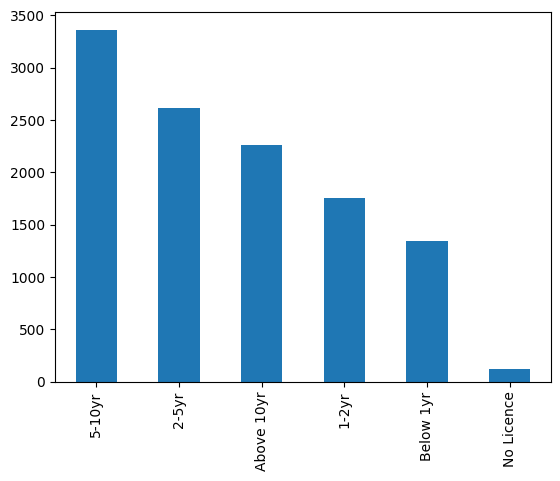

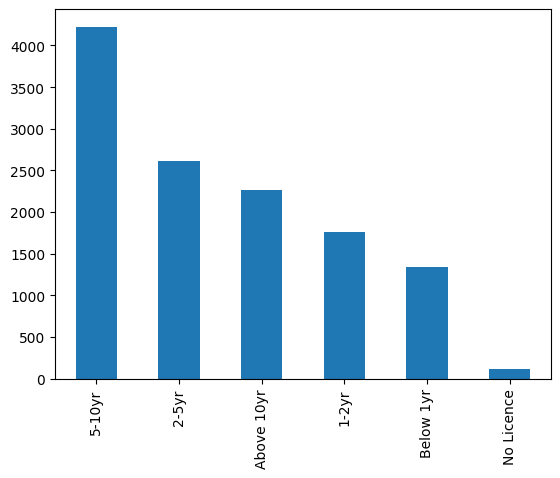

In [ ]:
road_df['Driving_experience'].value_counts().plot(kind='bar')
plt.show()
road_df['Driving_experience'] = road_df['Driving_experience'].fillna(road_df['Driving_experience'].mode().iloc[0])
road_df['Driving_experience'].value_counts().plot(kind='bar')
plt.show()

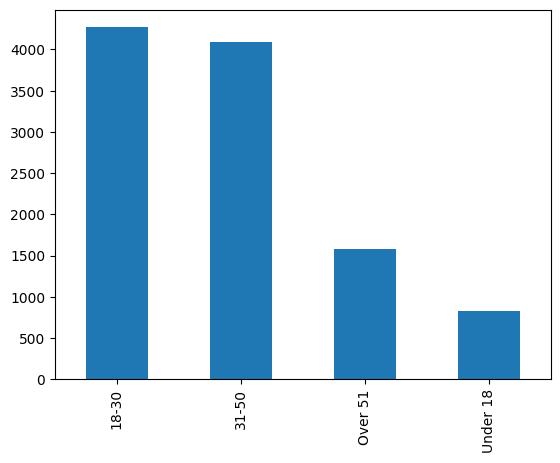

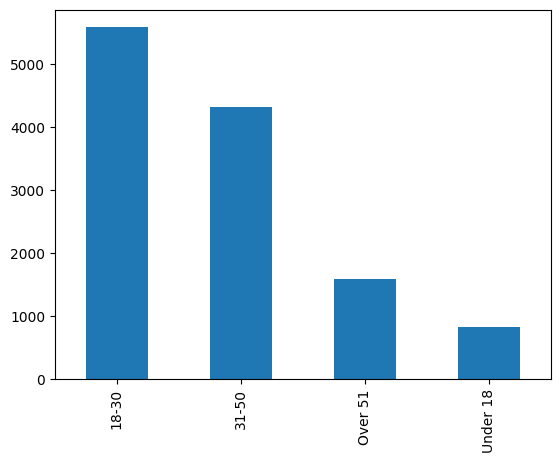

In [ ]:

def mode_func(x):
    return x.mode().iloc[0] if not x.empty else None

road_df['Age_band_of_driver'].value_counts().plot(kind='bar')
plt.show()
age_band_mode = road_df.groupby('Driving_experience')['Age_band_of_driver'].transform(mode_func)
road_df['Age_band_of_driver'] = road_df['Age_band_of_driver'].fillna(age_band_mode)
road_df['Age_band_of_driver'].value_counts().plot(kind='bar')
plt.show()

Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Illiterate              45
Name: Educational_level, dtype: int64
Junior high school    8460
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Illiterate              45
Name: Educational_level, dtype: int64


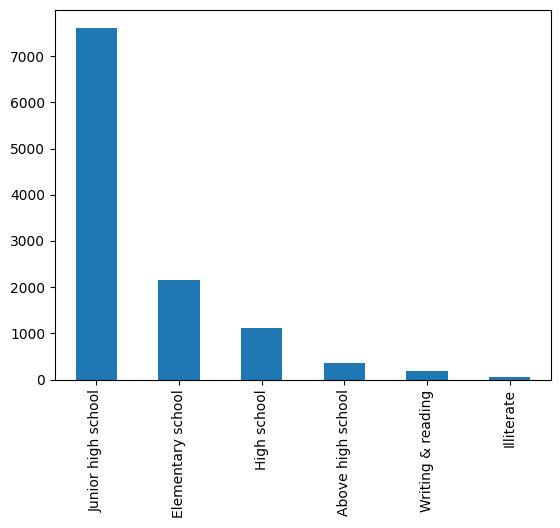

In [ ]:
print(road_df['Educational_level'].value_counts())
road_df['Educational_level'].value_counts().plot(kind='bar')
road_df['Educational_level'] = road_df['Educational_level'].fillna(road_df['Educational_level'].mode().iloc[0])
print(road_df['Educational_level'].value_counts())

Employee    9627
Owner       1973
Other        123
Name: Vehicle_driver_relation, dtype: int64


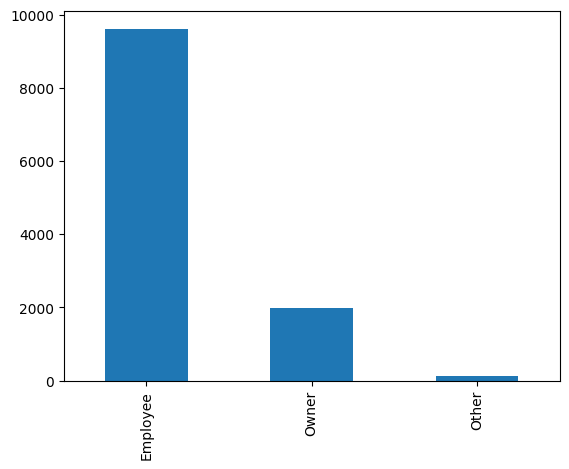

In [ ]:
print(road_df['Vehicle_driver_relation'].value_counts())
road_df['Vehicle_driver_relation'].value_counts().plot(kind='bar')
road_df['Vehicle_driver_relation'] = road_df['Vehicle_driver_relation'].fillna(road_df['Vehicle_driver_relation'].mode().iloc[0])

Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: Type_of_vehicle, dtype: int64


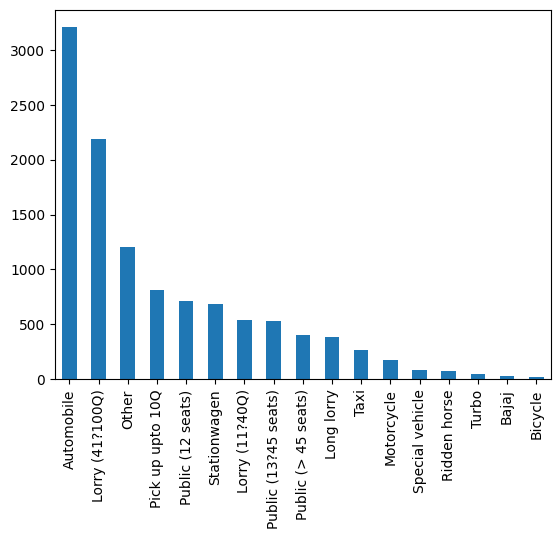

In [ ]:
print(road_df['Type_of_vehicle'].value_counts())
road_df['Type_of_vehicle'].value_counts().plot(kind='bar')
road_df['Type_of_vehicle'] = road_df['Type_of_vehicle'].fillna(road_df['Type_of_vehicle'].mode().iloc[0])

## 17 to 24

In [ ]:
road_df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                482
Service_year_of_vehicle        6811
Defect_of_vehicle              4427
Area_accident_occured           261
Lanes_or_Medians                442
Road_allignment                 142
Types_of_Junction              1078
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions              292
Type_of_collision               169
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                396
Casualty_class                 4443
Sex_of_casualty                4443
Age_band_of_casualty           4443
Casualty_severity              4443
Work_of_casuality           

Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: Road_surface_conditions, dtype: int64


<Axes: >

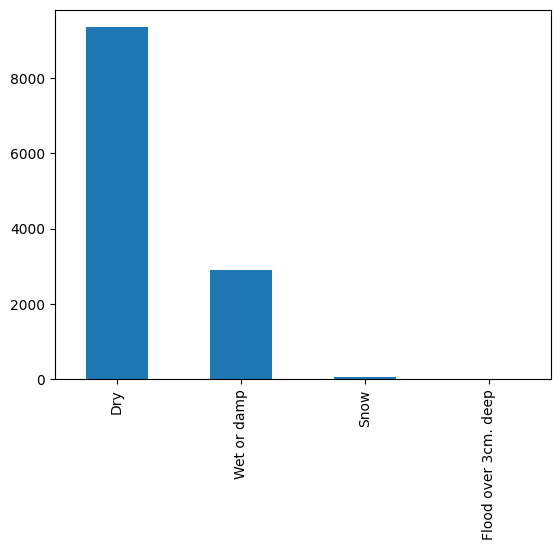

In [ ]:
print(road_df['Road_surface_conditions'].value_counts())
road_df['Road_surface_conditions'].value_counts().plot(kind='bar')

Daylight                   8798
Darkness - lights lit      3286
Darkness - no lighting      192
Darkness - lights unlit      40
Name: Light_conditions, dtype: int64


<Axes: >

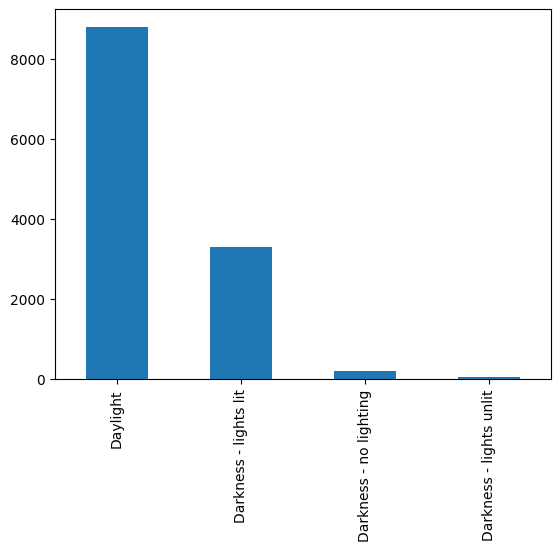

In [ ]:
print(road_df['Light_conditions'].value_counts())
road_df['Light_conditions'].value_counts().plot(kind='bar')

0


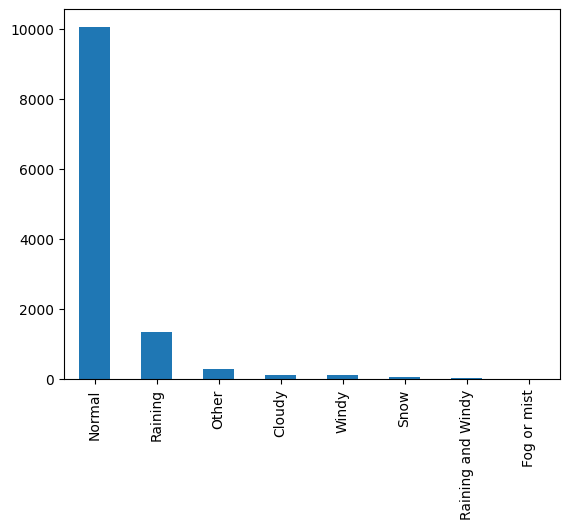

In [ ]:
# print(road_df['Weather_conditions'].value_counts())
# road_df['Weather_conditions'].replace('Unknown',np.nan, inplace = True)
road_df['Weather_conditions'].value_counts().plot(kind='bar')
grouped_mode = road_df.groupby(['Road_surface_conditions', 'Light_conditions'])['Weather_conditions'].transform(mode_func)
road_df['Weather_conditions'] = road_df['Weather_conditions'].fillna(grouped_mode)
print(road_df['Weather_conditions'].isnull().sum())

Vehicle with vehicle collision             8774
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
With Train                                    9
Name: Type_of_collision, dtype: int64
Vehicle with vehicle collision             8943
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
With Train                                    9
Name: Type_of_collision, dtype: int64


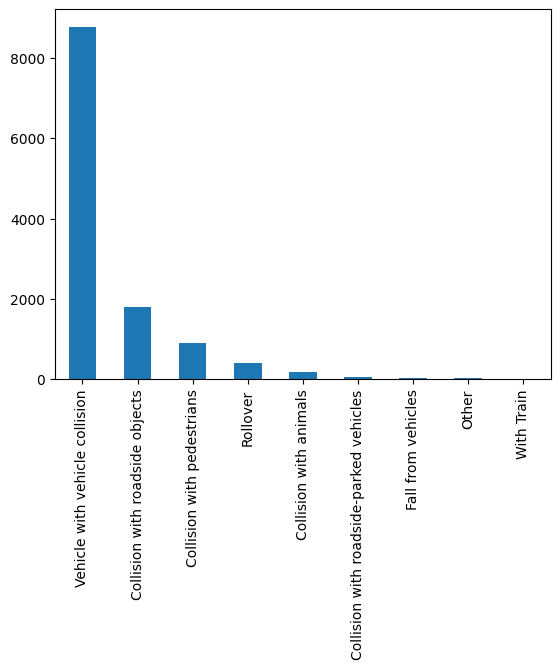

In [ ]:
print(road_df['Type_of_collision'].value_counts())
road_df['Type_of_collision'].replace('Unknown',np.nan, inplace = True)
road_df['Type_of_collision'].value_counts().plot(kind='bar')
road_df['Type_of_collision']= road_df['Type_of_collision'].fillna(road_df['Type_of_collision'].mode().iloc[0])
print(road_df['Type_of_collision'].value_counts())

2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: Number_of_vehicles_involved, dtype: int64


<Axes: >

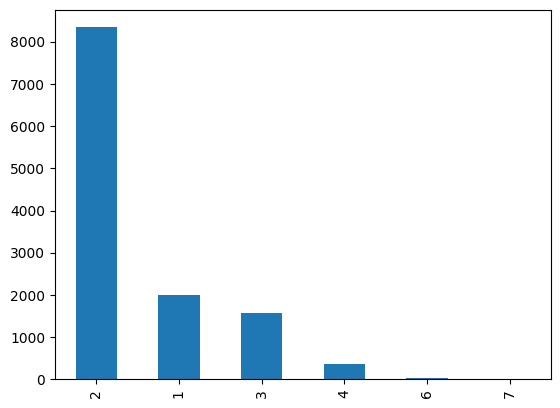

In [ ]:
print(road_df['Number_of_vehicles_involved'].value_counts())
#road_df['Number_of_vehicles_involved'].replace('Unknown',np.nan, inplace = True)
road_df['Number_of_vehicles_involved'].value_counts().plot(kind='bar')
#road_df['Number_of_vehicles_involved']= road_df['Number_of_vehicles_involved'].fillna(road_df['Number_of_vehicles_involved'].mode().iloc[0])
#print(road_df['Number_of_vehicles_involved'].value_counts())

1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: Number_of_casualties, dtype: int64


<Axes: >

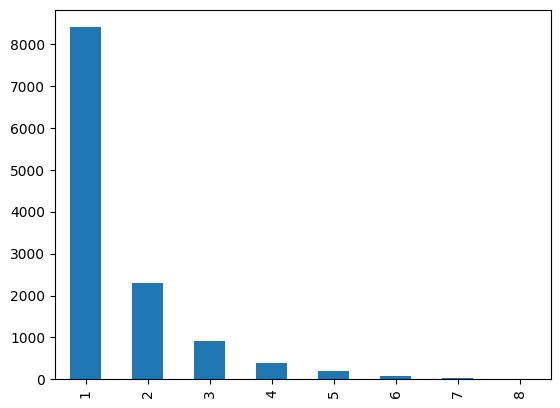

In [ ]:
print(road_df['Number_of_casualties'].value_counts())
#road_df['Number_of_casualties'].replace('Unknown',np.nan, inplace = True)
road_df['Number_of_casualties'].value_counts().plot(kind='bar')
#road_df['Number_of_casualties']= road_df['Number_of_casualties'].fillna(road_df['Number_of_casualties'].mode().iloc[0])
#print(road_df['Number_of_casualties'].value_counts())

In [ ]:
# print(road_df['Vehicle_movement'].value_counts())
# road_df['Vehicle_movement'].replace('Unknown',np.nan, inplace = True)
# road_df['Vehicle_movement'].value_counts().plot(kind='bar')
# Impute missing values for Vehicle_movement based on Type_of_collision
vehicle_movement_mode = road_df.groupby('Type_of_collision')['Vehicle_movement'].agg(lambda x:x.value_counts().index[0])
road_df['Vehicle_movement'] = road_df.apply(lambda x: vehicle_movement_mode[x['Type_of_collision']] if pd.isnull(x['Vehicle_movement']) else x['Vehicle_movement'], axis=1)
# road_df['Vehicle_movement']= road_df['Vehicle_movement'].fillna(road_df['Vehicle_movement'].mode().iloc[0])
print(road_df['Vehicle_movement'].isnull().sum())

0


Driver or rider    4944
Pedestrian         1649
Passenger          1280
Name: Casualty_class, dtype: int64


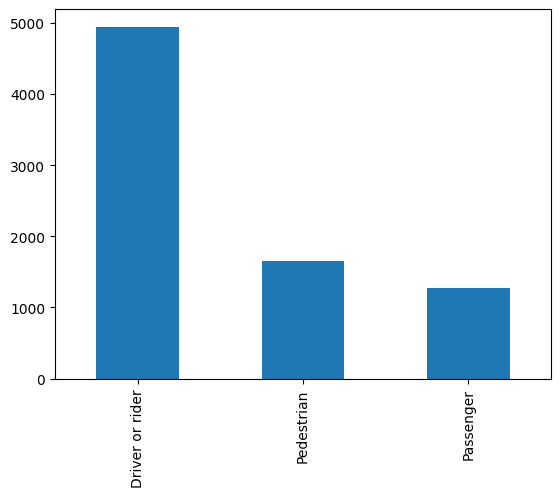

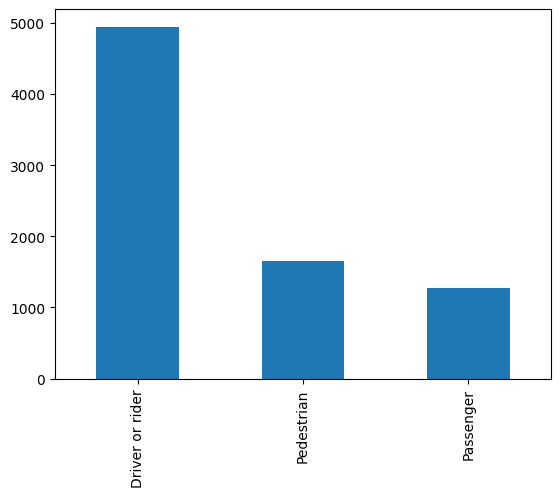

Driver or rider    9387
Pedestrian         1649
Passenger          1280
Name: Casualty_class, dtype: int64


In [ ]:
# 'NA'
print(road_df['Casualty_class'].value_counts())
road_df['Casualty_class'].value_counts().plot(kind='bar')
plt.show()
road_df['Casualty_class'].replace('na',np.nan, inplace = True)
road_df['Casualty_class'].value_counts().plot(kind='bar')
plt.show()
road_df['Casualty_class']= road_df['Casualty_class'].fillna(road_df['Casualty_class'].mode().iloc[0])
print(road_df['Casualty_class'].value_counts())

In [ ]:
road_df['Road_allignment']= road_df['Road_allignment'].fillna(road_df['Road_allignment'].mode().iloc[0])

In [ ]:
junction_mode = road_df.groupby('Road_allignment')['Types_of_Junction'].transform(mode_func)
road_df['Types_of_Junction'] = road_df['Types_of_Junction'].fillna(junction_mode)

In [ ]:
accident_severity_mode = road_df.groupby(['Type_of_collision', 'Casualty_severity'])['Accident_severity'].transform(mode_func)
road_df['Accident_severity'] = road_df['Accident_severity'].fillna(accident_severity_mode)

In [ ]:

road_df['Owner_of_vehicle']= road_df['Owner_of_vehicle'].fillna(road_df['Owner_of_vehicle'].mode().iloc[0])

In [ ]:
road_df['Area_accident_occured']= road_df[ 'Area_accident_occured'].fillna(road_df[ 'Area_accident_occured'].mode().iloc[0])

In [ ]:

road_df['Road_surface_type']= road_df[ 'Road_surface_type'].fillna(road_df[ 'Road_surface_type'].mode().iloc[0])


In [ ]:
road_df['Road_surface_type']= road_df[ 'Road_surface_type'].fillna(road_df[ 'Road_surface_type'].mode().iloc[0])

In [ ]:
road_df['Pedestrian_movement']= road_df[ 'Pedestrian_movement'].fillna(road_df[ 'Pedestrian_movement'].mode().iloc[0])

In [ ]:
road_df['Cause_of_accident']= road_df[ 'Cause_of_accident'].fillna(road_df[ 'Cause_of_accident'].mode().iloc[0])


In [ ]:

road_df['Sex_of_casualty']= road_df[ 'Sex_of_casualty'].fillna(road_df[ 'Sex_of_casualty'].mode().iloc[0])
road_df['Age_band_of_casualty']= road_df[ 'Age_band_of_casualty'].fillna(road_df[ 'Age_band_of_casualty'].mode().iloc[0])
road_df['Work_of_casuality']= road_df[ 'Work_of_casuality'].fillna(road_df[ 'Work_of_casuality'].mode().iloc[0])
road_df['Fitness_of_casuality']= road_df[ 'Fitness_of_casuality'].fillna(road_df[ 'Fitness_of_casuality'].mode().iloc[0])


In [ ]:
age_band_mode = road_df.groupby('Area_accident_occured')['Age_band_of_casualty'].transform(mode_func)
road_df['Age_band_of_casualty'] = road_df['Age_band_of_casualty'].fillna(age_band_mode)

In [ ]:
severity_mode = road_df.groupby('Type_of_collision')['Casualty_severity'].transform(mode_func)
road_df['Casualty_severity'] = road_df['Casualty_severity'].fillna(severity_mode)

In [ ]:
print("Service year - ", road_df['Service_year_of_vehicle'].isnull().sum(), "\n", "Defect of the vehicle - ", road_df['Defect_of_vehicle'].isnull().sum())

defect = road_df.groupby('Type_of_vehicle')['Defect_of_vehicle'].transform(mode_func)
road_df['Defect_of_vehicle'] = road_df['Defect_of_vehicle'].fillna(defect)


service_year = road_df.groupby('Defect_of_vehicle')['Service_year_of_vehicle'].transform(mode_func)
road_df['Service_year_of_vehicle'] = road_df['Service_year_of_vehicle'].fillna(service_year)


defect = road_df.groupby('Type_of_collision')['Vehicle_movement'].transform(mode_func)
road_df['Vehicle_movement'] = road_df['Vehicle_movement'].fillna(defect)

Service year -  6811 
 Defect of the vehicle -  4427


In [ ]:
road_df['Lanes_or_Medians']= road_df[ 'Lanes_or_Medians'].fillna(road_df[ 'Lanes_or_Medians'].mode().iloc[0])

In [ ]:
road_df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [ ]:
road_df.loc[road_df['Age_band_of_casualty'] == '5', 'Age_band_of_casualty'] = 'under 5'
road_df['Age_band_of_casualty'].value_counts()

18-30       7588
31-50       2455
Under 18    1035
Over 51      994
under 5      244
Name: Age_band_of_casualty, dtype: int64

# Data Analysis 1

In [ ]:
pd.crosstab(road_df['Day_of_week'], road_df['Light_conditions'])

Light_conditions,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Day_of_week,,,,
Friday,568,4,25,1444
Monday,392,14,31,1244
Saturday,551,6,22,1087
Sunday,475,5,21,966
Thursday,445,2,35,1369
Tuesday,435,6,28,1301
Wednesday,420,3,30,1387


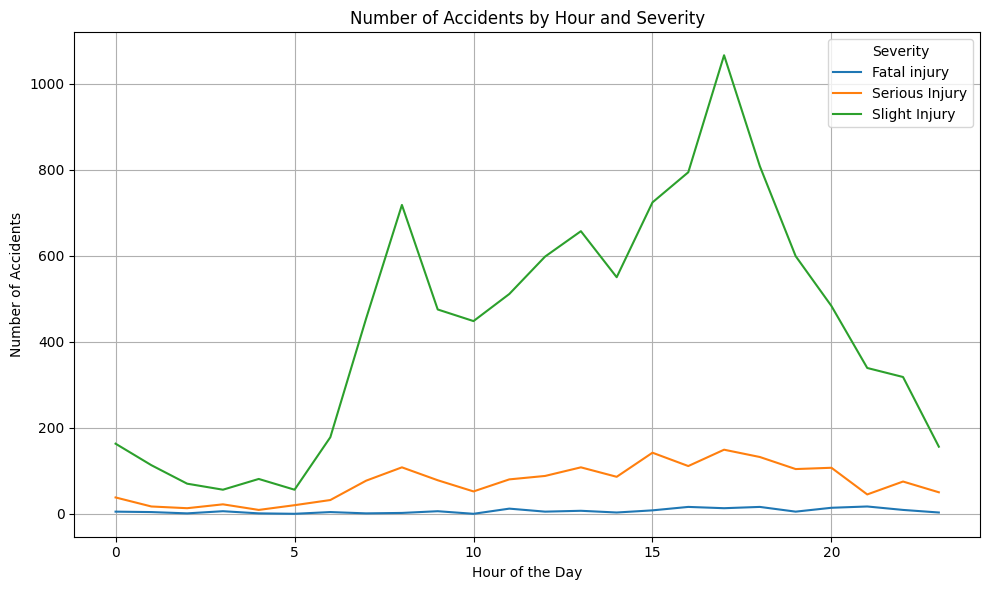

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the relevant columns

# Convert 'Time' column to datetime if it's not already
road_df['Time'] = pd.to_datetime(road_df['Time'])

# Extract hour of the day from the 'Time' column
road_df['Hour'] = road_df['Time'].dt.hour

# Aggregate data by hour and accident severity
hourly_accidents = road_df.groupby(['Hour', 'Accident_severity']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))

# Plot lines for each level of accident severity
for severity in hourly_accidents.columns:
    plt.plot(hourly_accidents.index, hourly_accidents[severity], label=severity)

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Hour and Severity')
plt.legend(title='Severity')
plt.grid(True)
plt.tight_layout()
plt.show()




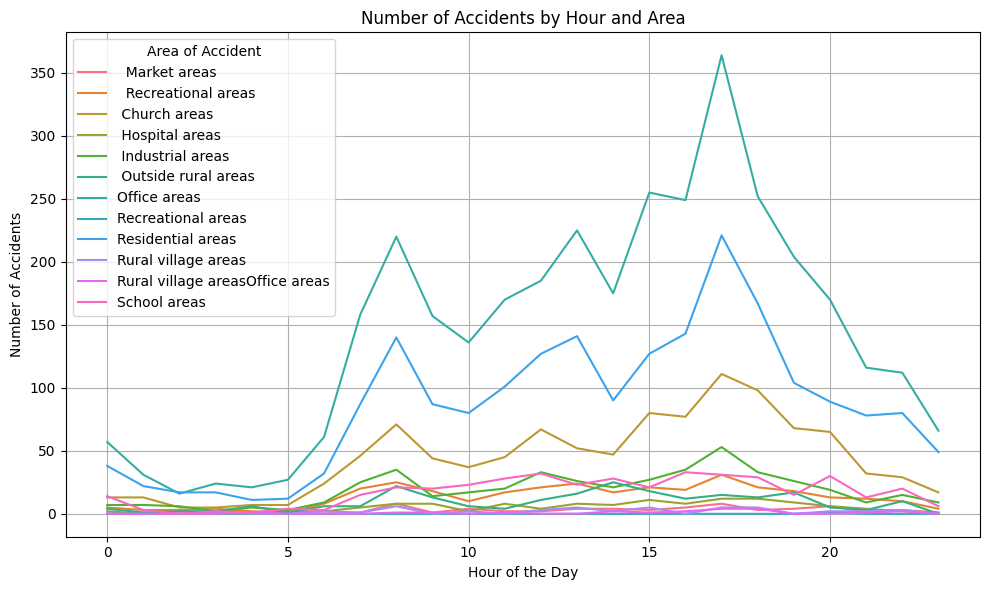

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the relevant columns

# Convert 'Time' column to datetime if it's not already
road_df['Time'] = pd.to_datetime(road_df['Time'])

# Extract hour of the day from the 'Time' column
road_df['Hour'] = road_df['Time'].dt.hour

road_df = road_df[road_df['Area_accident_occured'] != 'Other']

plt.figure(figsize=(10, 6))

# Aggregate data by hour and area of accident
hourly_accidents = road_df.groupby(['Hour', 'Area_accident_occured']).size().unstack(fill_value=0)

colors = sns.color_palette('husl', len(hourly_accidents.columns))
# Plot the data using the specified colors
for i, area in enumerate(hourly_accidents.columns):
    plt.plot(hourly_accidents.index, hourly_accidents[area], label=area, color=colors[i])

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Hour and Area')
plt.legend(title='Area of Accident')
plt.grid(True)
plt.tight_layout()
plt.show()


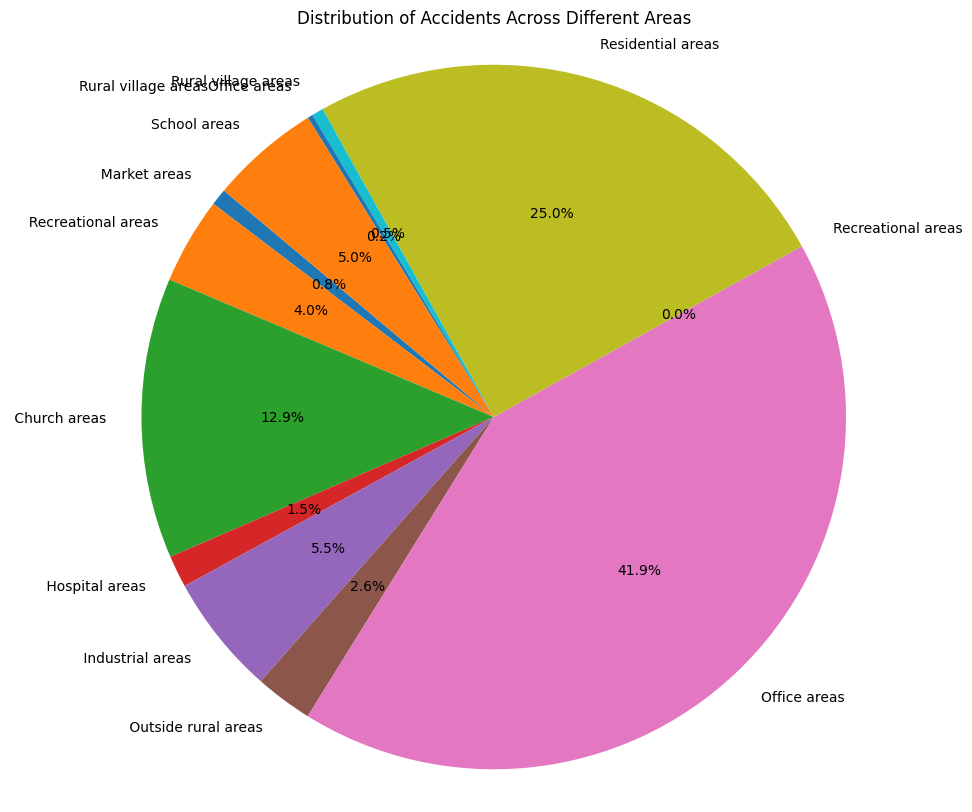

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming road_df is your DataFrame containing the relevant columns

# Convert 'Time' column to datetime if it's not already
road_df['Time'] = pd.to_datetime(road_df['Time'])

# Extract hour of the day from the 'Time' column
road_df['Hour'] = road_df['Time'].dt.hour

# Aggregate data by area of accident
accidents_by_area = road_df.groupby('Area_accident_occured').size()

# Plotting a single pie chart for all hours combined
plt.figure(figsize=(10, 10))
plt.pie(accidents_by_area, labels=accidents_by_area.index, autopct='%1.1f%%', startangle=140)
plt.rcParams.update({'font.size': 10})
plt.title('Distribution of Accidents Across Different Areas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


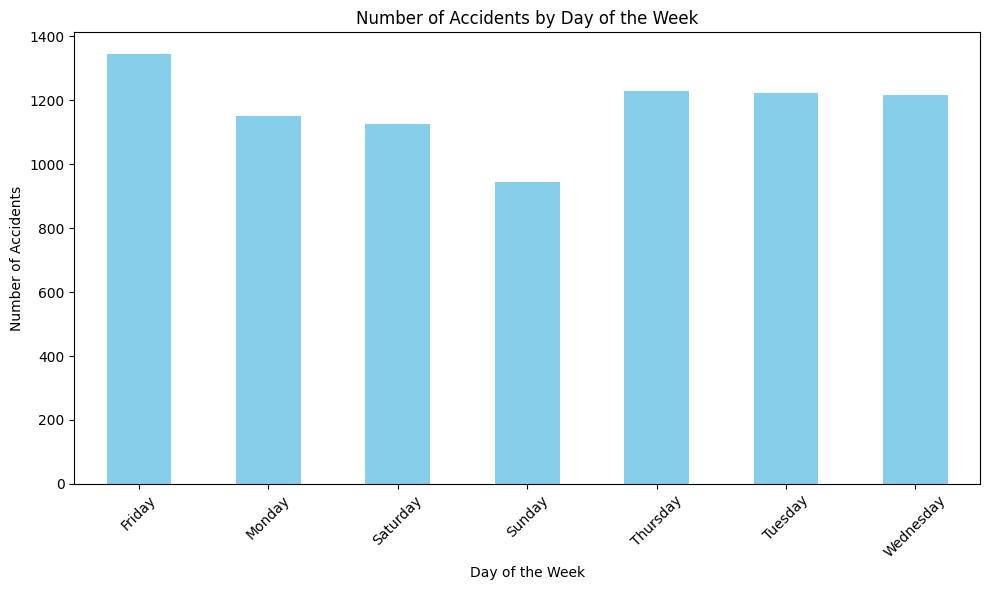

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming road_df is your DataFrame containing the relevant columns



# Aggregate data by day of the week
daily_accidents = road_df.groupby('Day_of_week').size()
# Plotting
plt.figure(figsize=(10, 6))
daily_accidents.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

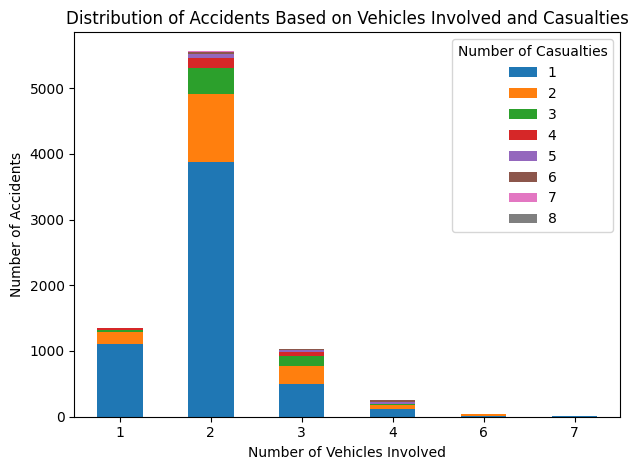

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming road_df is your DataFrame containing the relevant columns

# Count the number of accidents for each combination of vehicles involved and casualties
accidents_distribution = road_df.groupby(['Number_of_vehicles_involved', 'Number_of_casualties']).size().unstack(fill_value=0)

# Plotting a bar chart for the distribution of accidents based on the number of vehicles involved and casualties
plt.figure(figsize=(12, 6))
accidents_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents Based on Vehicles Involved and Casualties')
plt.xticks(rotation=0)
plt.legend(title='Number of Casualties')
plt.tight_layout()
plt.show()
#


<Figure size 1000x600 with 0 Axes>

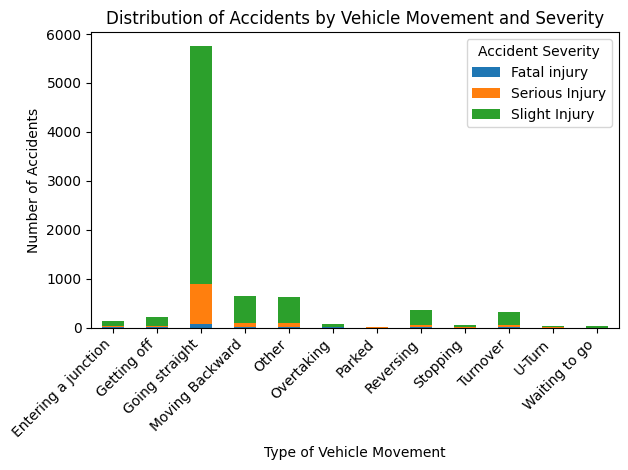

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming road_df is your DataFrame containing the relevant columns

# Group the data by 'Vehicle_movement' and 'Accident_severity', then count the occurrences
accidents_by_movement_severity = road_df.groupby(['Vehicle_movement', 'Accident_severity']).size().unstack(fill_value=0)

# Plotting a stacked bar chart
plt.figure(figsize=(10, 6))
accidents_by_movement_severity.plot(kind='bar', stacked=True)
plt.xlabel('Type of Vehicle Movement')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Vehicle Movement and Severity')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Accident Severity')
plt.tight_layout()
plt.show()


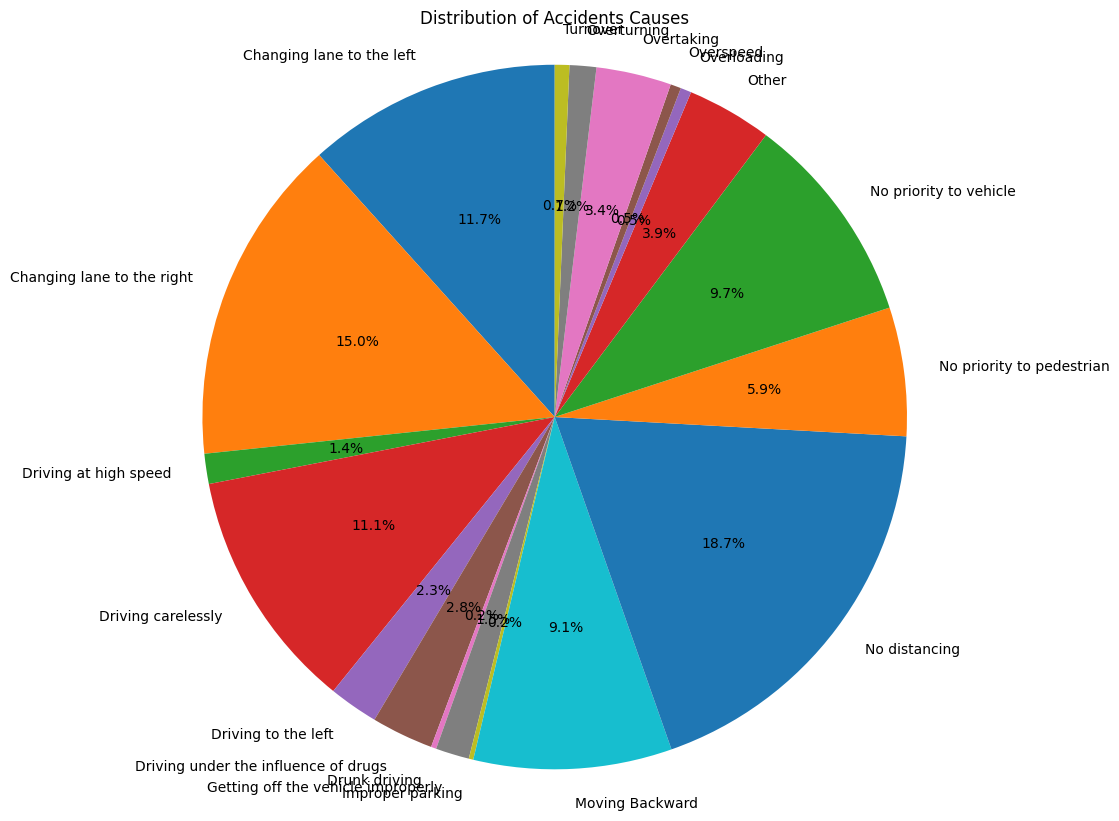

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Aggregate data by area of accident
accidents_by_cause = road_df.groupby('Cause_of_accident').size()

# Plotting a single pie chart for all hours combined
plt.figure(figsize=(10, 10))
plt.pie(accidents_by_cause, labels=accidents_by_cause.index, autopct='%1.1f%%', startangle=90)
plt.rcParams.update({'font.size': 10})
plt.title('Distribution of Accidents Causes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

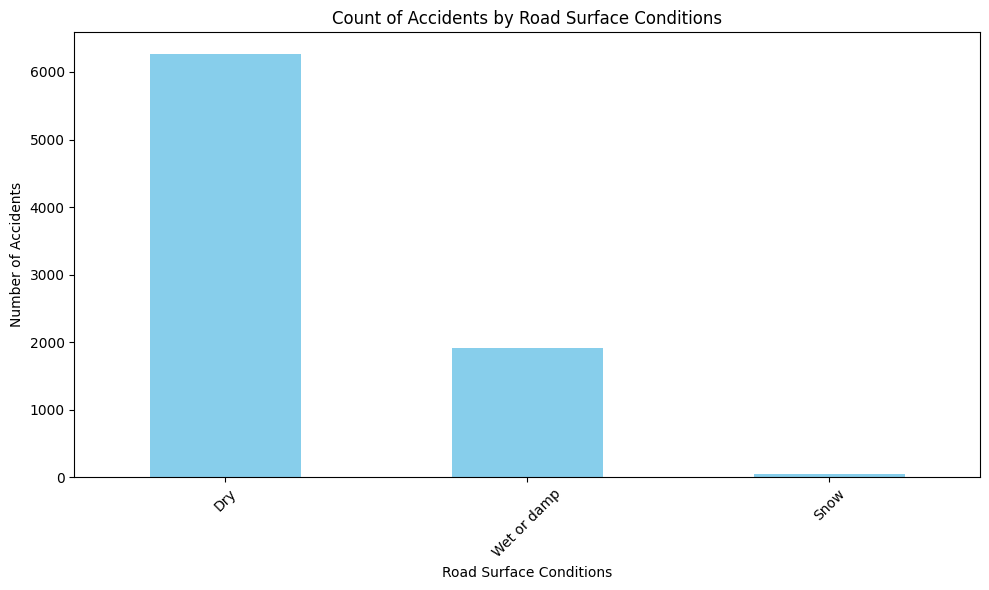

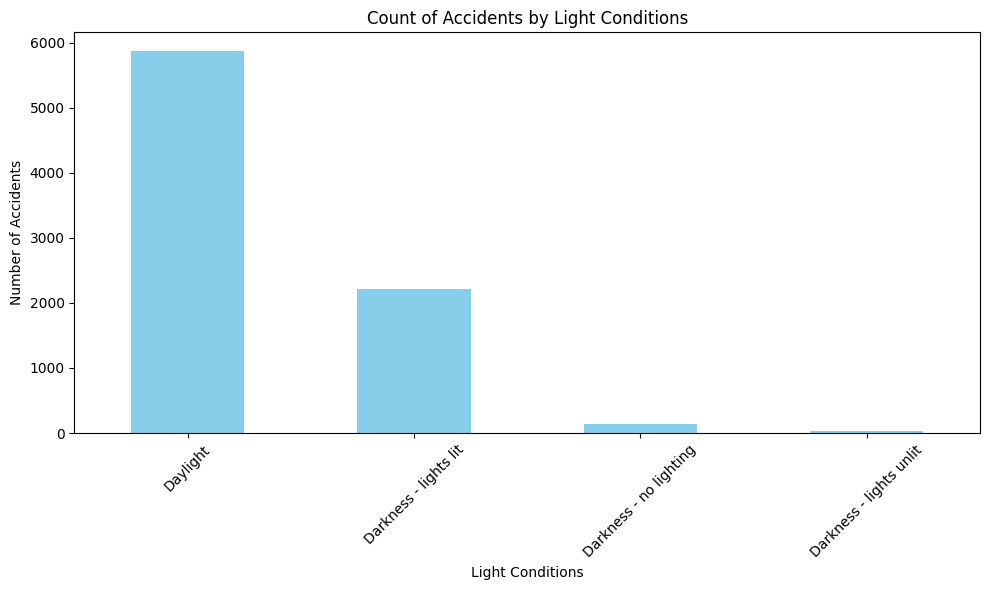

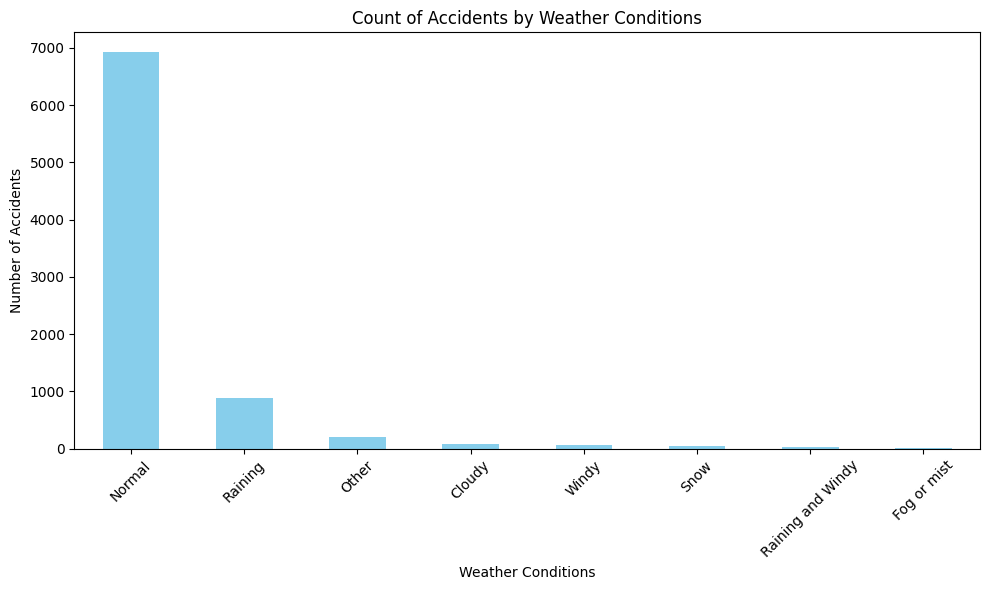

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming road_df is your DataFrame containing the relevant columns

# Environmental factors: road surface conditions, light conditions, weather conditions
factors = ['Road_surface_conditions', 'Light_conditions', 'Weather_conditions']

# Plot separate bar charts for each environmental factor
for factor in factors:
    # Filter the dataset to include only the relevant columns and drop rows with missing values
    factor_df = road_df[[factor]].dropna()

    # Group the filtered data by the environmental factor and count the occurrences
    factor_counts = factor_df[factor].value_counts()

    # Plotting a bar chart for the count of accidents based on the environmental factor
    plt.figure(figsize=(10, 6))
    factor_counts.plot(kind='bar', color='skyblue')
    plt.xlabel(factor.replace('_', ' ').title())  # Beautify the x-axis label
    plt.ylabel('Number of Accidents')
    plt.title(f'Count of Accidents by {factor.replace("_", " ").title()}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()



<Figure size 1000x600 with 0 Axes>

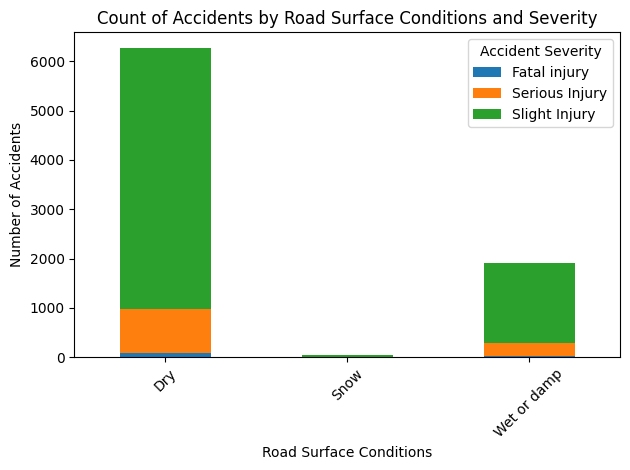

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming road_df is your DataFrame containing the relevant columns

# Filter the dataset to include only the relevant columns for road surface conditions and accident severity
road_surface_severity_df = road_df[['Road_surface_conditions', 'Accident_severity']].dropna()

# Group the filtered data by road surface conditions and accident severity and count the occurrences
surface_severity_counts = road_surface_severity_df.groupby(['Road_surface_conditions', 'Accident_severity']).size().unstack(fill_value=0)

# Plotting a stacked bar chart
plt.figure(figsize=(10, 6))
surface_severity_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.title('Count of Accidents by Road Surface Conditions and Severity')
plt.xticks(rotation=45)
plt.legend(title='Accident Severity')
plt.tight_layout()
plt.show()


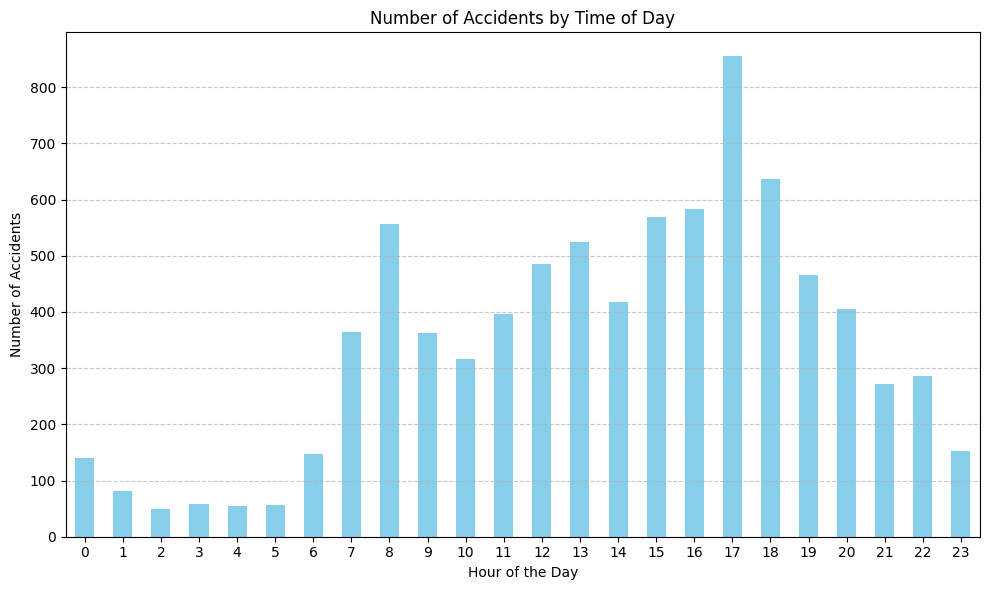

In [ ]:
road_df['Time'] = pd.to_datetime(road_df['Time'])
accidents_by_time = road_df.groupby(road_df['Time'].dt.hour).size()

# Plot the data
plt.figure(figsize=(10, 6))
accidents_by_time.plot(kind='bar', color='skyblue')
plt.title('Number of Accidents by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-50-49a4357648fd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junction_df.dropna(inplace=True)


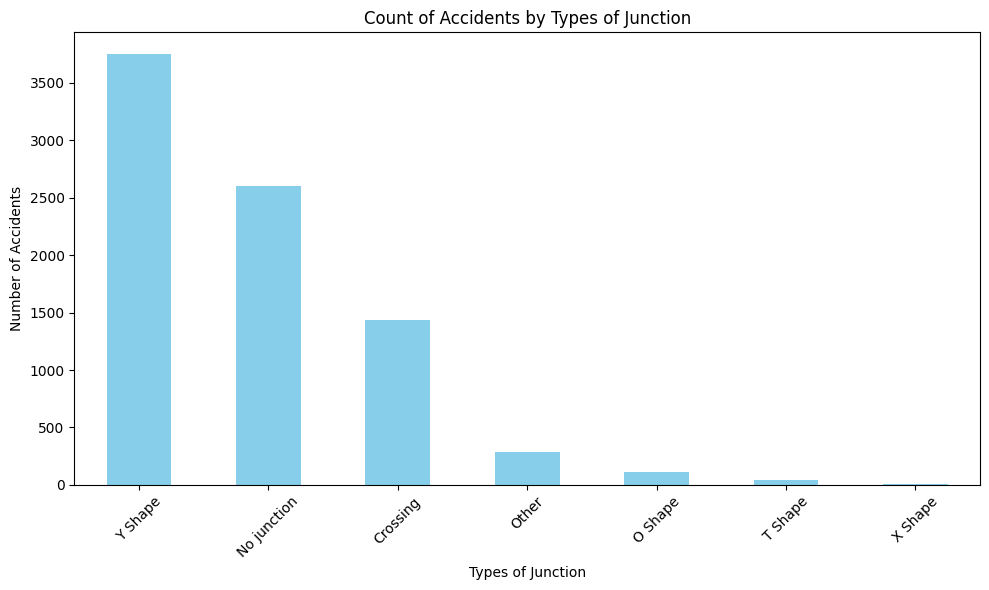

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming road_df is your DataFrame containing the relevant columns

# Filter the dataset to include only the relevant columns for junction type and accident severity
junction_df = road_df[['Types_of_Junction']]

# Drop rows with missing values
junction_df.dropna(inplace=True)

# Group the data by junction type and count the occurrences
junction_counts = junction_df['Types_of_Junction'].value_counts()

# Plotting a bar chart for the count of accidents by junction type
plt.figure(figsize=(10, 6))
junction_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Types of Junction')
plt.ylabel('Number of Accidents')
plt.title('Count of Accidents by Types of Junction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-51-eede16e5a3b0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surface_alignment_df.dropna(inplace=True)


<Figure size 3000x600 with 0 Axes>

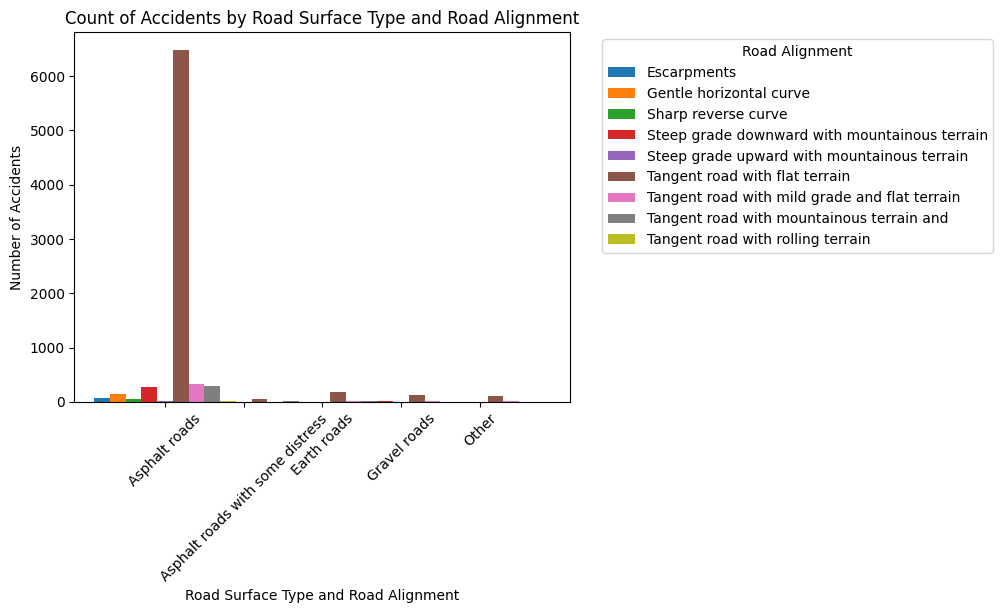

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming road_df is your DataFrame containing the relevant columns

# Filter the dataset to include only the relevant columns for road surface type, road alignment, and accident severity
surface_alignment_df = road_df[['Road_surface_type', 'Road_allignment']]

# Drop rows with missing values
surface_alignment_df.dropna(inplace=True)

# Group the data by road surface type, road alignment, and count the occurrences
surface_alignment_counts = surface_alignment_df.groupby(['Road_surface_type', 'Road_allignment']).size().unstack(fill_value=0)

# Plotting a grouped bar chart
plt.figure(figsize=(30, 6))
surface_alignment_counts.plot(kind='bar', width=1.8)
plt.xlabel('Road Surface Type and Road Alignment')
plt.ylabel('Number of Accidents')
plt.title('Count of Accidents by Road Surface Type and Road Alignment')
plt.xticks(rotation=45)
plt.legend(title='Road Alignment',bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
plt.show()


Demographic and Personal Information:

Age_band_of_driver    
Sex_of_driver      
Educational_level    
Driving_experience    
Sex_of_casualty     
Age_band_of_casualty   
Work_of_casuality    
Fitness_of_casuality    

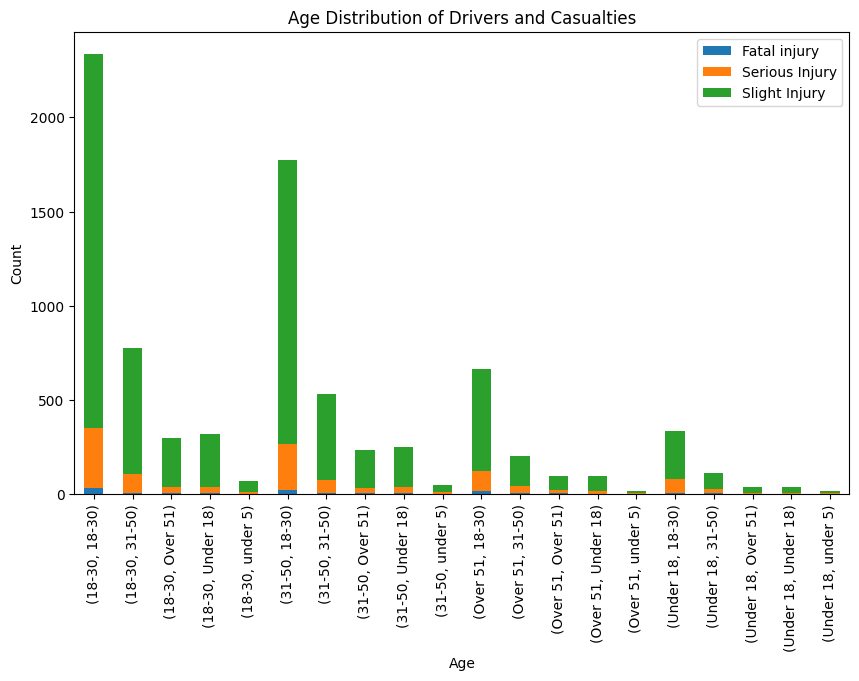

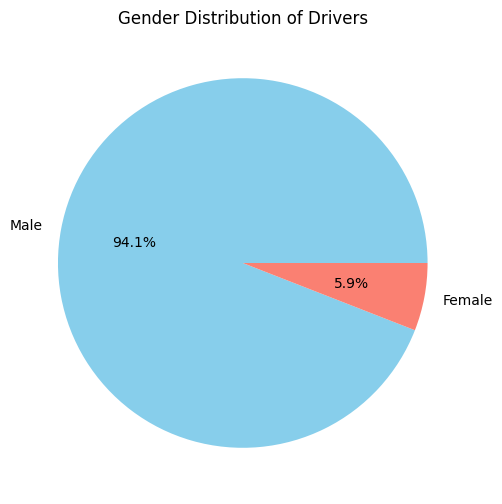

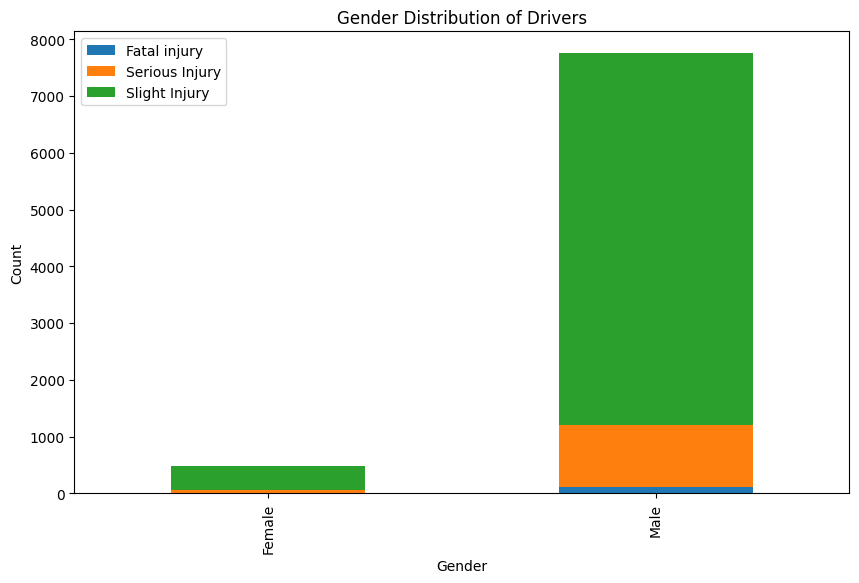

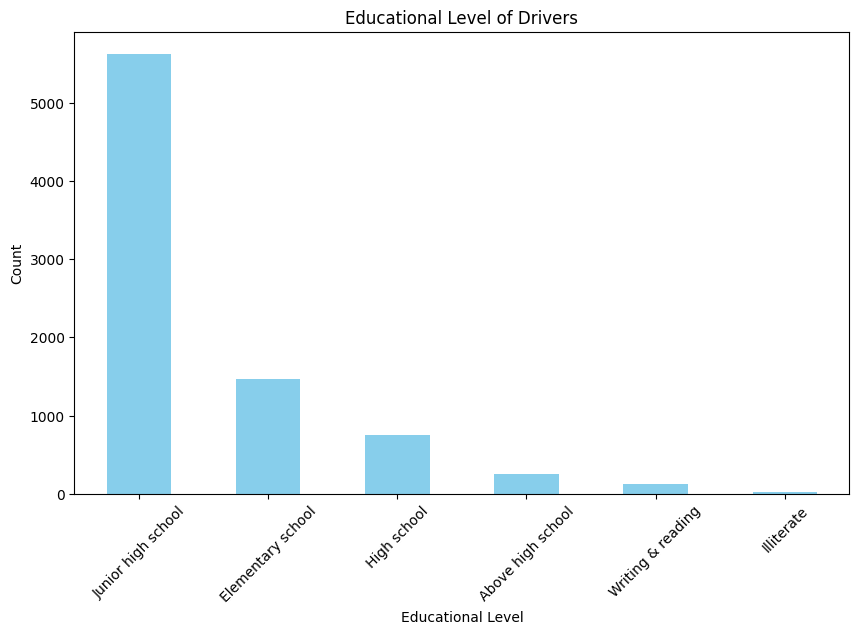

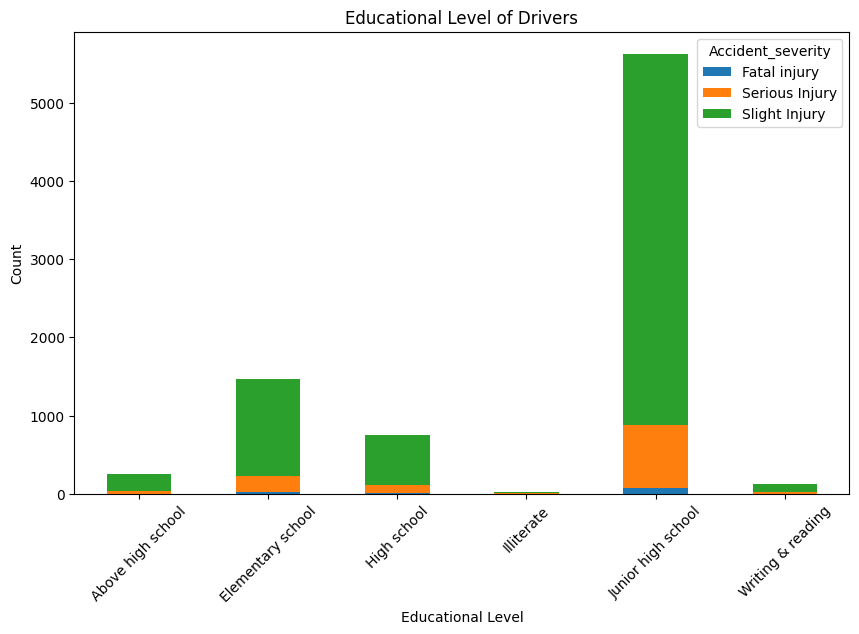

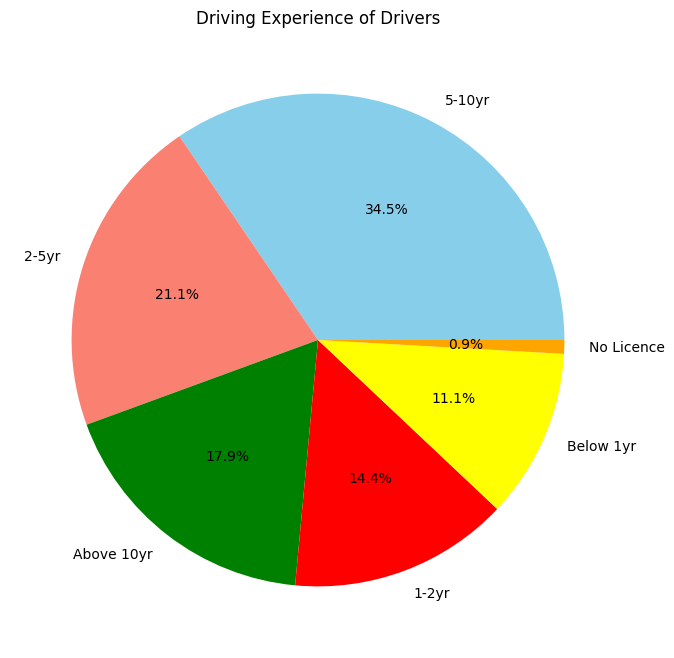

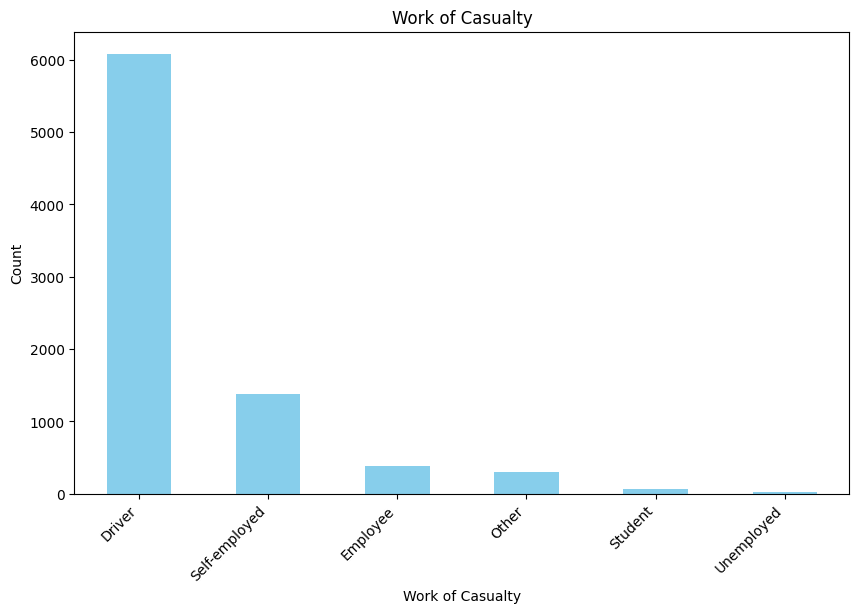

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Age Distribution of Drivers and Casualties (Histogram)

grouped = road_df.groupby([road_df["Age_band_of_driver"], road_df["Age_band_of_casualty"], road_df["Accident_severity"]]).size().unstack()

# Plotting the bar graph
grouped.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Drivers and Casualties')
plt.legend()
plt.show()

# Gender Distribution of Drivers and Casualties (Pie Chart)
gender_counts = road_df['Sex_of_driver'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Gender Distribution of Drivers')
plt.show()

grouped = road_df.groupby([road_df["Sex_of_driver"], road_df["Accident_severity"]]).size().unstack()
grouped.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution of Drivers')
plt.legend()
plt.show()


# Educational Level of Drivers (Bar Chart)
education_counts = road_df['Educational_level'].value_counts()
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Educational Level')
plt.ylabel('Count')
plt.title('Educational Level of Drivers')
plt.xticks(rotation=45)
plt.show()

grouped = road_df.groupby([road_df["Educational_level"], road_df["Accident_severity"]]).size().unstack()
grouped.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel('Educational Level')
plt.ylabel('Count')
plt.title('Educational Level of Drivers')
plt.xticks(rotation=45)
plt.show()


# Driving Experience of Drivers (Bar Chart)
import pandas as pd
import matplotlib.pyplot as plt

# Assuming road_df is your DataFrame containing the relevant columns

# Driving Experience of Drivers (Pie Chart)
experience_counts = road_df['Driving_experience'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(experience_counts, labels=experience_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon', 'green', 'red','yellow','orange'])
plt.title('Driving Experience of Drivers')
plt.show()


# Work of Casualty (Bar Chart)
work_counts = road_df['Work_of_casuality'].value_counts()
plt.figure(figsize=(10, 6))
work_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Work of Casualty')
plt.ylabel('Count')
plt.title('Work of Casualty')
plt.xticks(rotation=45, ha = 'right')
plt.show()



Type_of_vehicle    
Owner_of_vehicle   
Service_year_of_vehicle   
Defect_of_vehicle

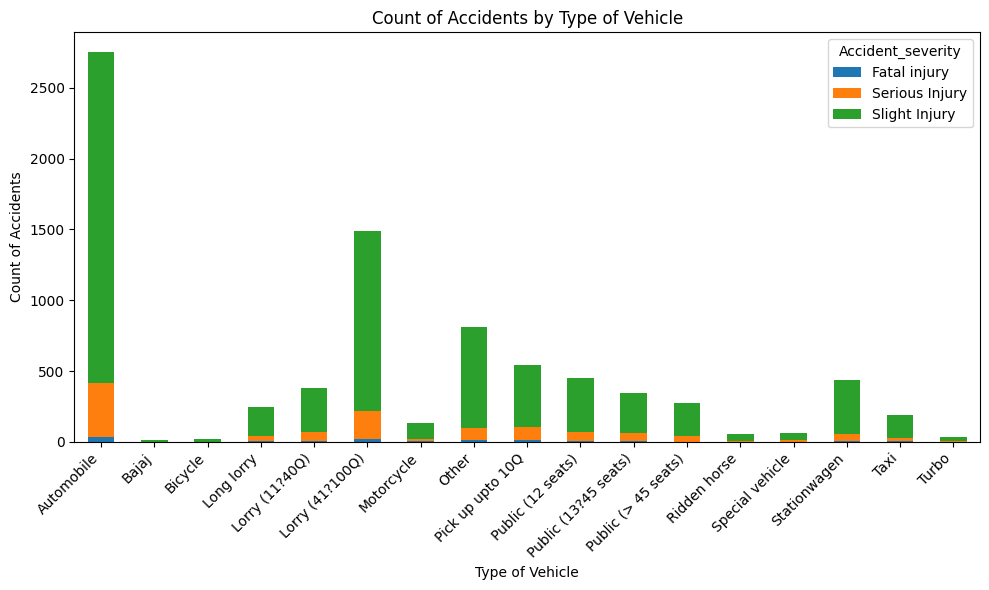

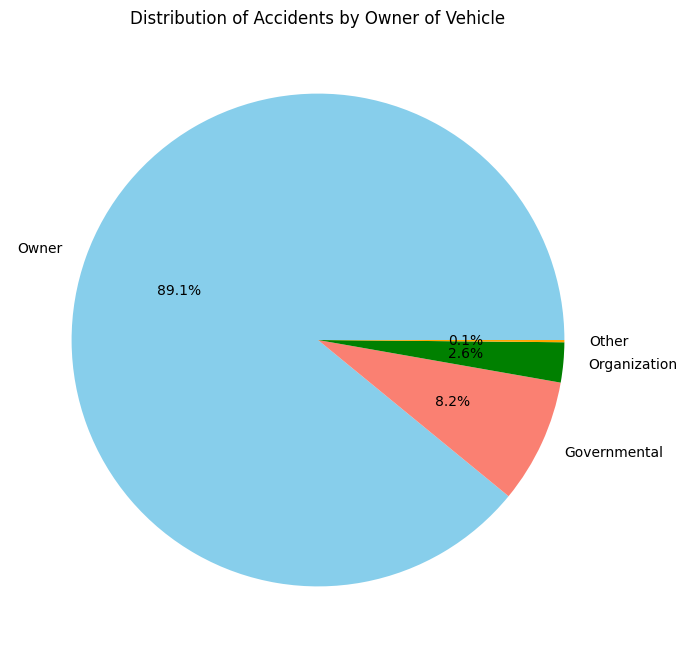

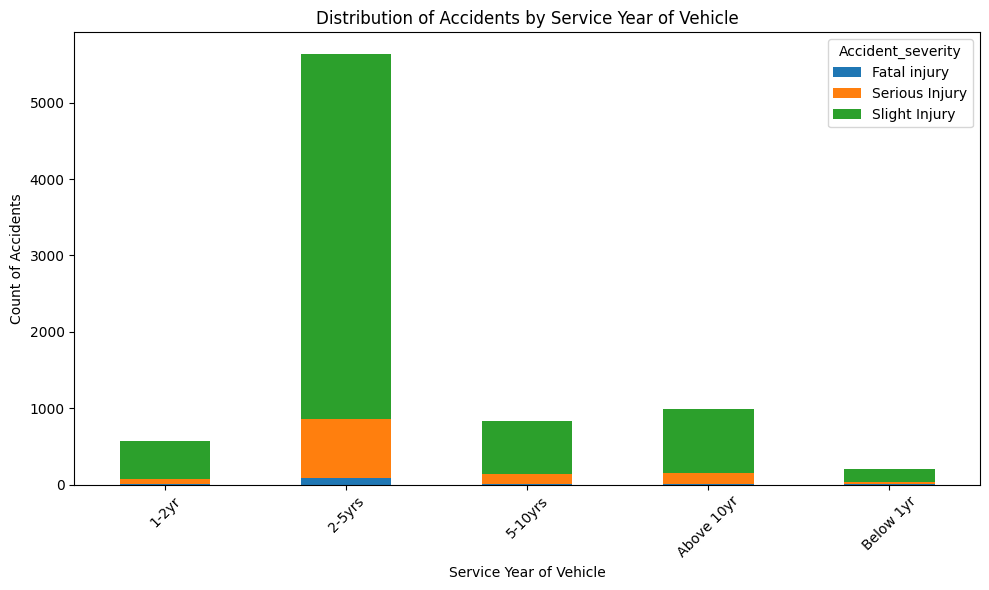

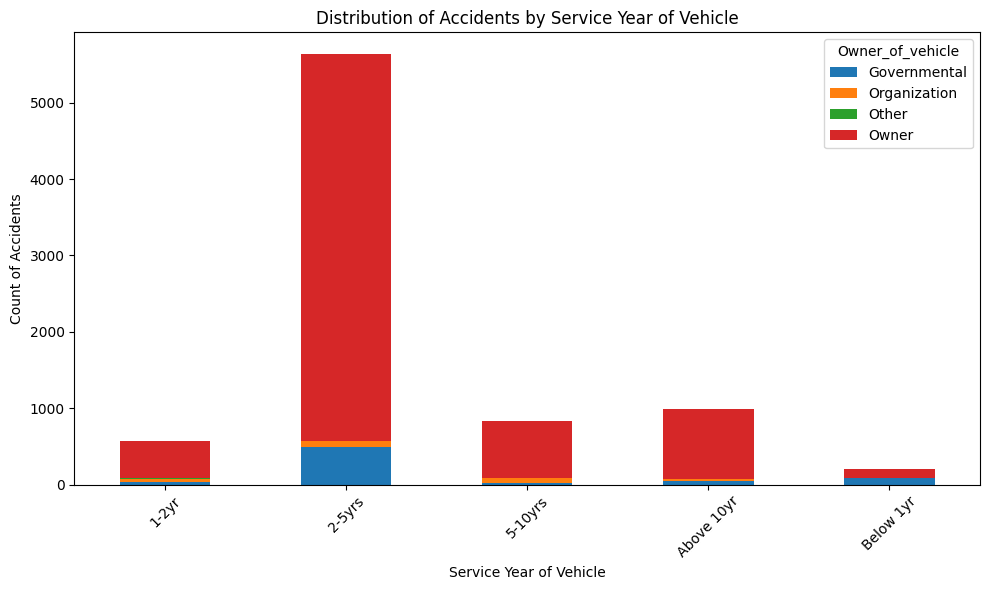

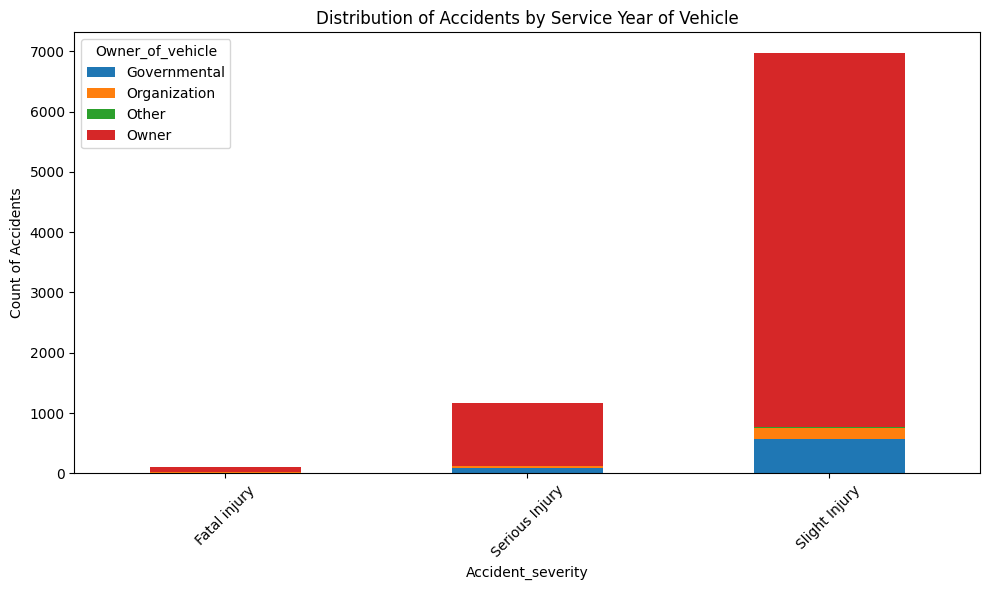

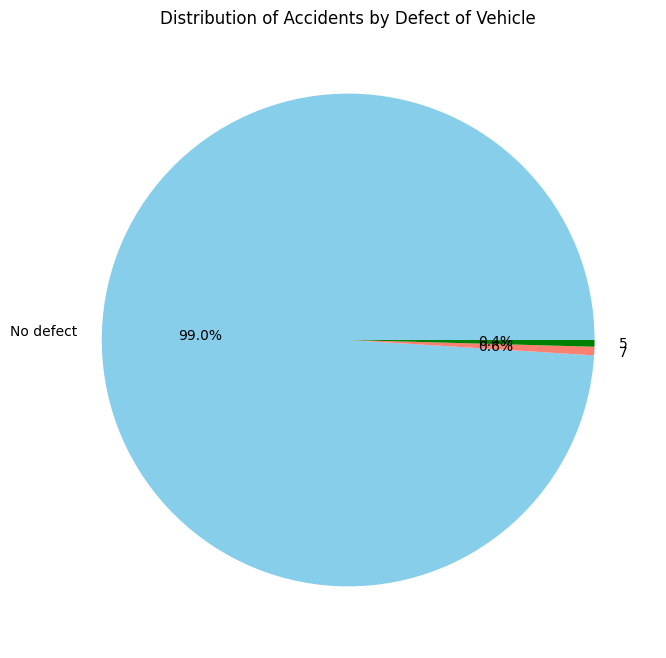

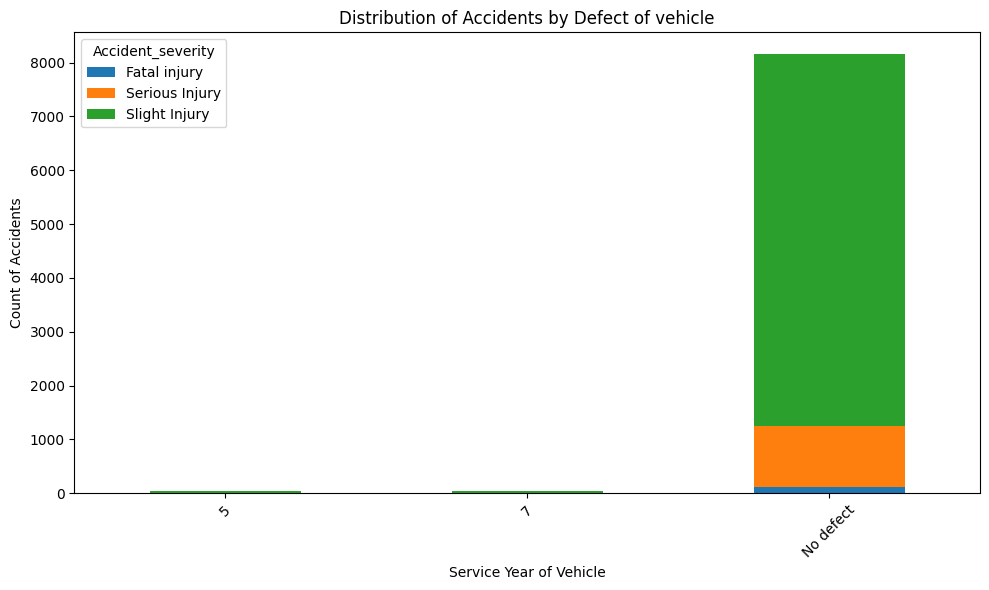

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming road_df is your DataFrame containing the relevant columns

# Type of Vehicle (Bar Chart)
grouped = road_df.groupby([road_df["Type_of_vehicle"], road_df["Accident_severity"]]).size().unstack()
grouped.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel('Type of Vehicle')
plt.ylabel('Count of Accidents')
plt.title('Count of Accidents by Type of Vehicle')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

# Owner of Vehicle (Pie Chart)
owner_counts = road_df['Owner_of_vehicle'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(owner_counts, labels=owner_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon', 'green', 'orange'])
plt.title('Distribution of Accidents by Owner of Vehicle')
plt.show()

# Service Year of Vehicle (Histogram)
grouped = road_df.groupby([road_df["Service_year_of_vehicle"], road_df["Accident_severity"]]).size().unstack()
grouped.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel('Service Year of Vehicle')
plt.ylabel('Count of Accidents')
plt.title('Distribution of Accidents by Service Year of Vehicle')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

grouped = road_df.groupby([road_df["Service_year_of_vehicle"], road_df["Owner_of_vehicle"]]).size().unstack()
grouped.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel('Service Year of Vehicle')
plt.ylabel('Count of Accidents')
plt.title('Distribution of Accidents by Service Year of Vehicle')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


grouped = road_df.groupby([road_df["Accident_severity"], road_df["Owner_of_vehicle"]]).size().unstack()
grouped.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel('Accident_severity')
plt.ylabel('Count of Accidents')
plt.title('Distribution of Accidents by Service Year of Vehicle')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Defect of Vehicle (Pie Chart)
defect_counts = road_df['Defect_of_vehicle'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(defect_counts, labels=defect_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon', 'green', 'orange'])
plt.title('Distribution of Accidents by Defect of Vehicle')
plt.show()


grouped = road_df.groupby([road_df["Defect_of_vehicle"], road_df["Accident_severity"]]).size().unstack()
grouped.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel('Service Year of Vehicle')
plt.ylabel('Count of Accidents')
plt.title('Distribution of Accidents by Defect of vehicle')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Environmental and Road Conditions:

Area_accident_occurred   
Lanes_or_Medians        
Road_alignment    
Types_of_Junction    
Road_surface_type      
Road_surface_conditions     
Light_conditions    
Weather_conditions     

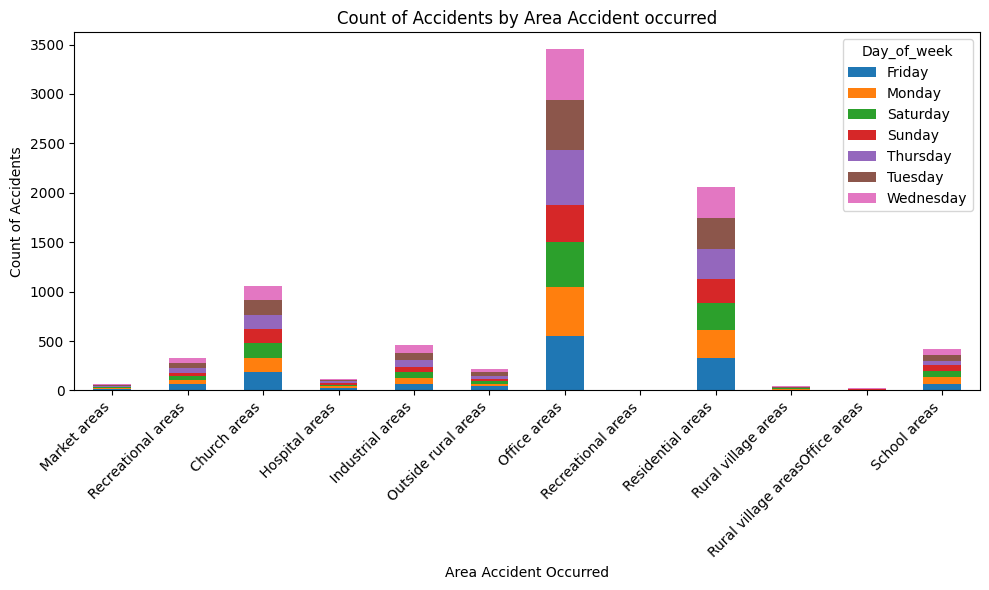

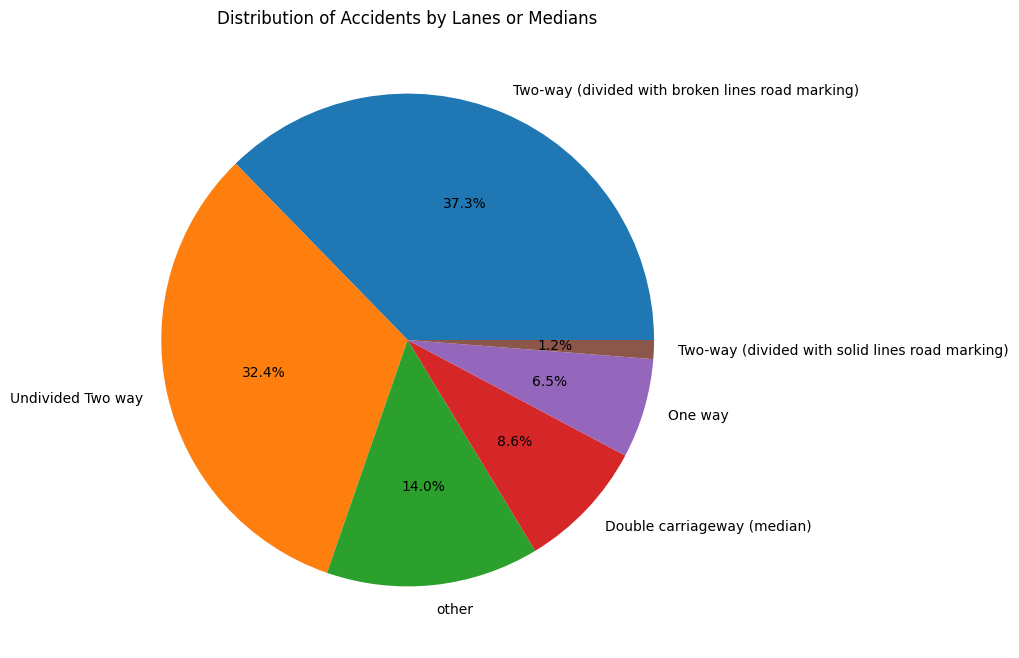

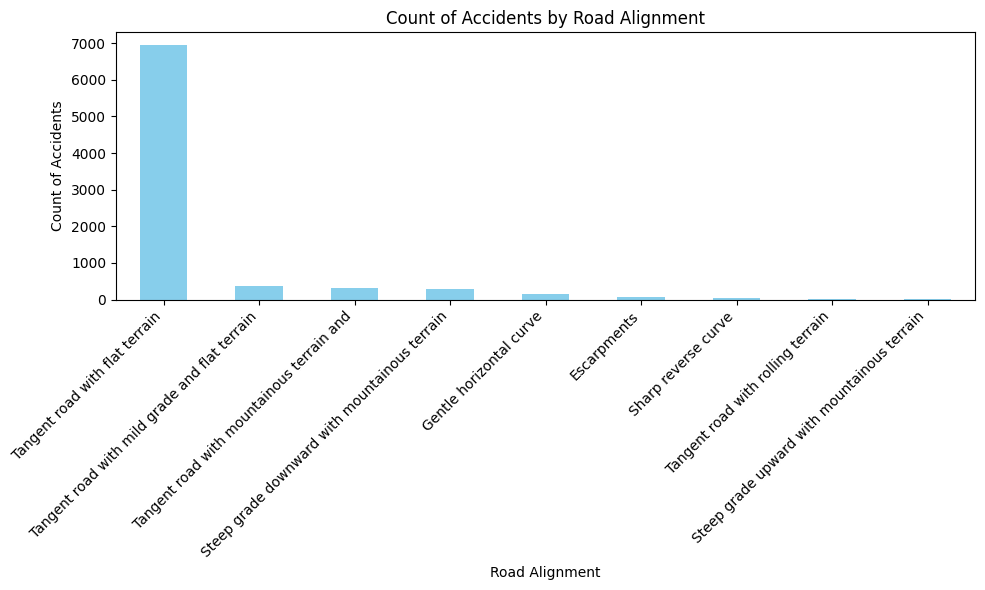

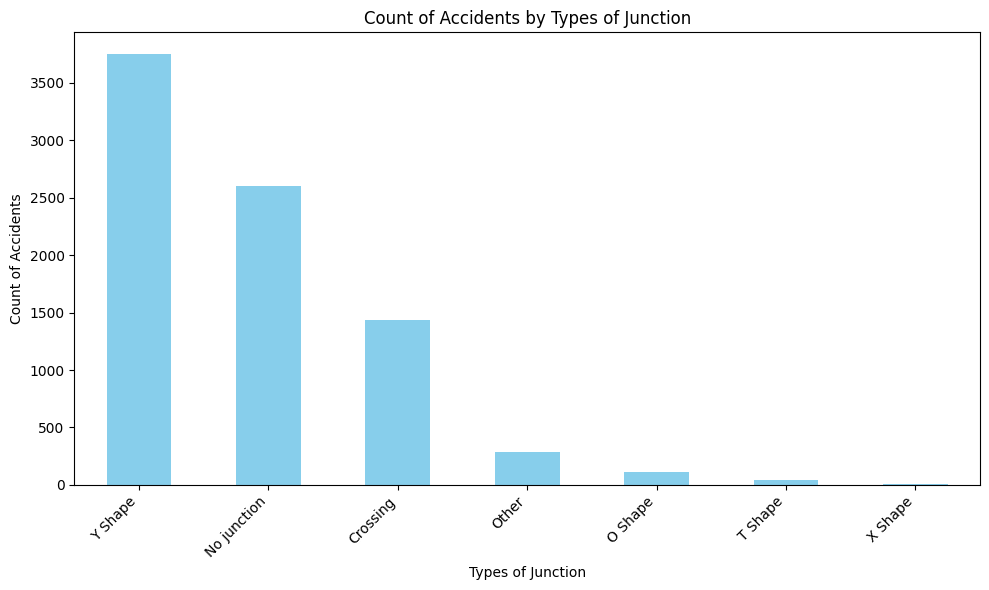

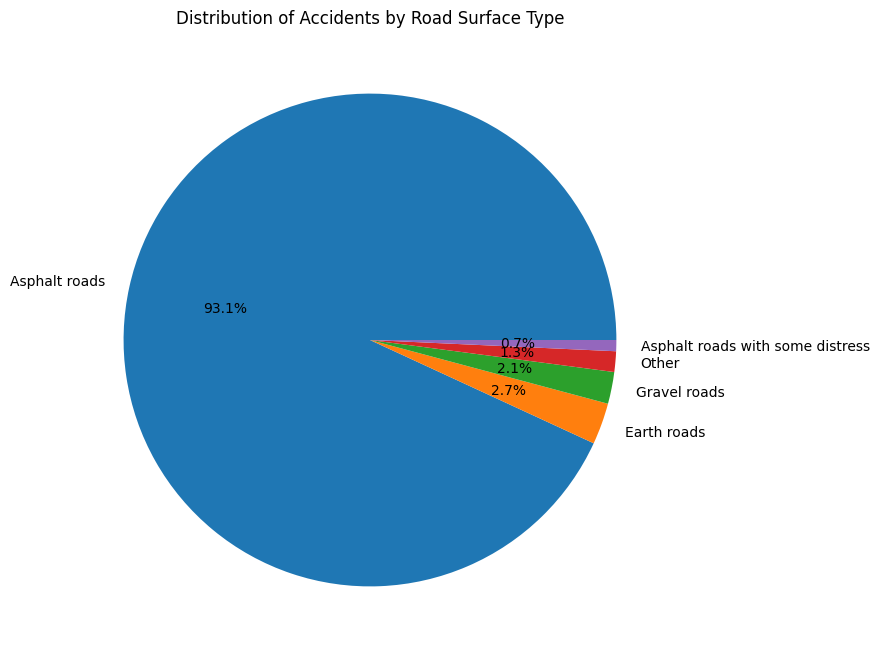

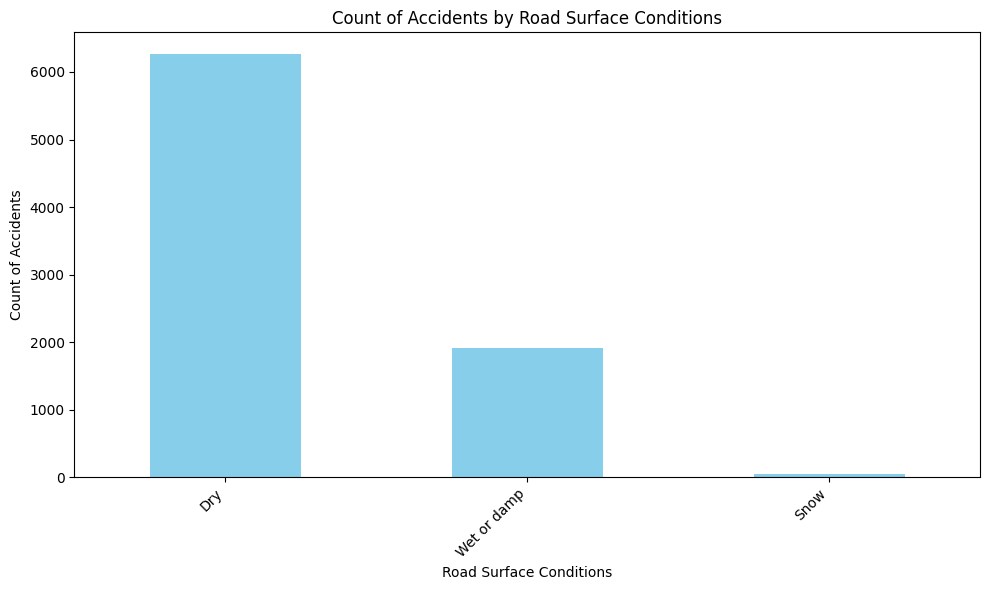

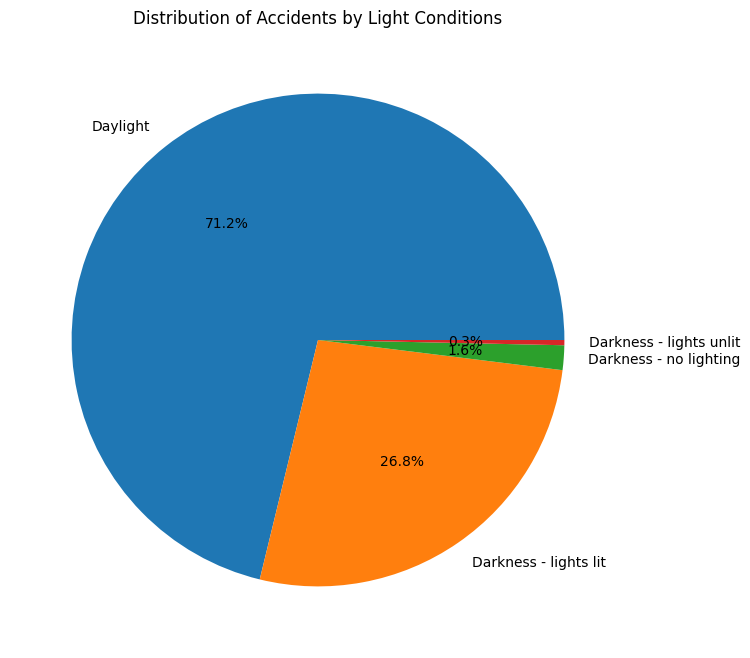

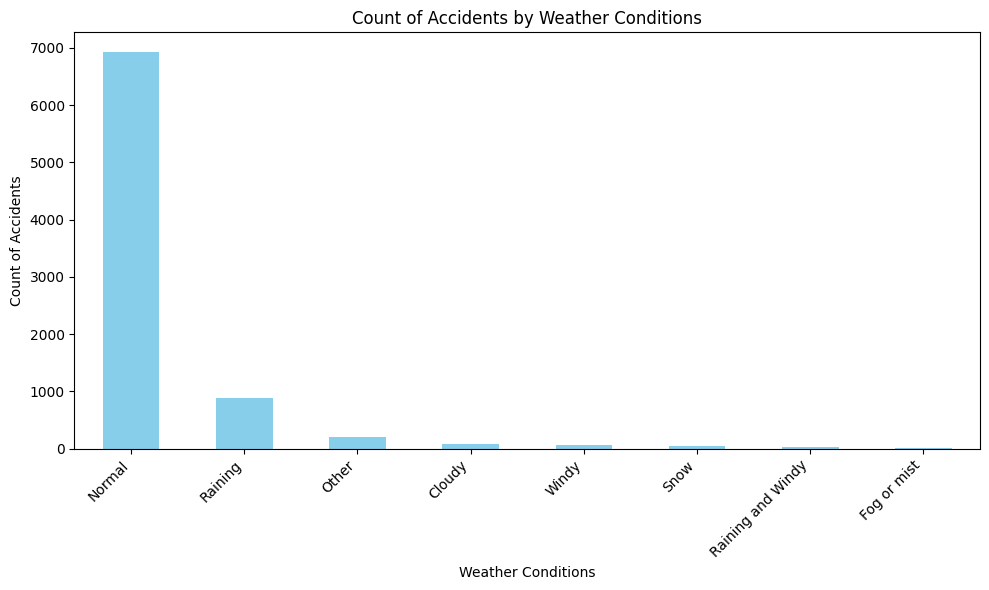

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming road_df is your DataFrame containing the relevant columns

# Area Accident Occurred (Bar Chart)
grouped = road_df.groupby([road_df["Area_accident_occured"], road_df["Day_of_week"]]).size().unstack()
grouped.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel('Area Accident Occurred')
plt.ylabel('Count of Accidents')
plt.title('Count of Accidents by Area Accident occurred')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

color_map = plt.get_cmap('tab10')

# Lanes or Medians (Pie Chart)
lanes_medians_counts = road_df['Lanes_or_Medians'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(lanes_medians_counts, labels=lanes_medians_counts.index, autopct='%1.1f%%', colors=[color_map(i) for i in range(len(lanes_medians_counts))])
plt.title('Distribution of Accidents by Lanes or Medians')
plt.show()

# Road Alignment (Bar Chart)
alignment_counts = road_df['Road_allignment'].value_counts()
plt.figure(figsize=(10, 6))
alignment_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Road Alignment')
plt.ylabel('Count of Accidents')
plt.title('Count of Accidents by Road Alignment')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

# Types of Junction (Bar Chart)
junction_counts = road_df['Types_of_Junction'].value_counts()
plt.figure(figsize=(10, 6))
junction_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Types of Junction')
plt.ylabel('Count of Accidents')
plt.title('Count of Accidents by Types of Junction')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()


# Road Surface Type (Pie Chart)
surface_type_counts = road_df['Road_surface_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(surface_type_counts, labels=surface_type_counts.index, autopct='%1.1f%%', colors=[color_map(i) for i in range(len(surface_type_counts))])
plt.title('Distribution of Accidents by Road Surface Type')
plt.show()

# Road Surface Conditions (Bar Chart)
surface_conditions_counts = road_df['Road_surface_conditions'].value_counts()
plt.figure(figsize=(10, 6))
surface_conditions_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Count of Accidents')
plt.title('Count of Accidents by Road Surface Conditions')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

# Light Conditions (Pie Chart)
light_counts = road_df['Light_conditions'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(light_counts, labels=light_counts.index, autopct='%1.1f%%', colors=[color_map(i) for i in range(len(light_counts))])
plt.title('Distribution of Accidents by Light Conditions')
plt.show()

# Weather Conditions (Bar Chart)
weather_counts = road_df['Weather_conditions'].value_counts()
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Weather Conditions')
plt.ylabel('Count of Accidents')
plt.title('Count of Accidents by Weather Conditions')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()


**Accident Details:**

Time       
Day_of_week                
Number_of_vehicles_involved     
Number_of_casualties    
Vehicle_movement    
Casualty_class     
Casualty_severity    
Pedestrian_movement    
Cause_of_accident    
Accident_severity    
Type_of_collision    

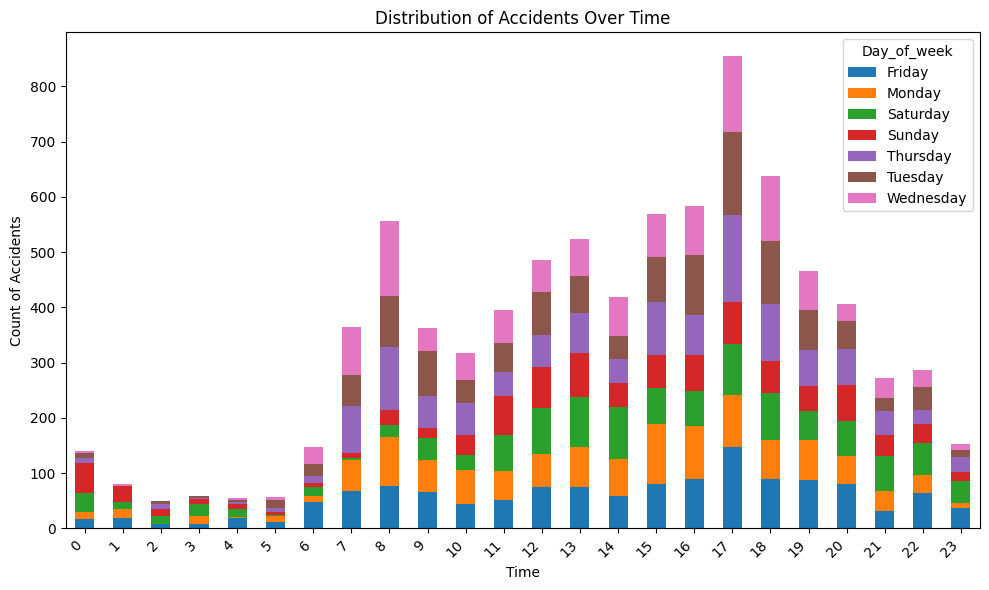

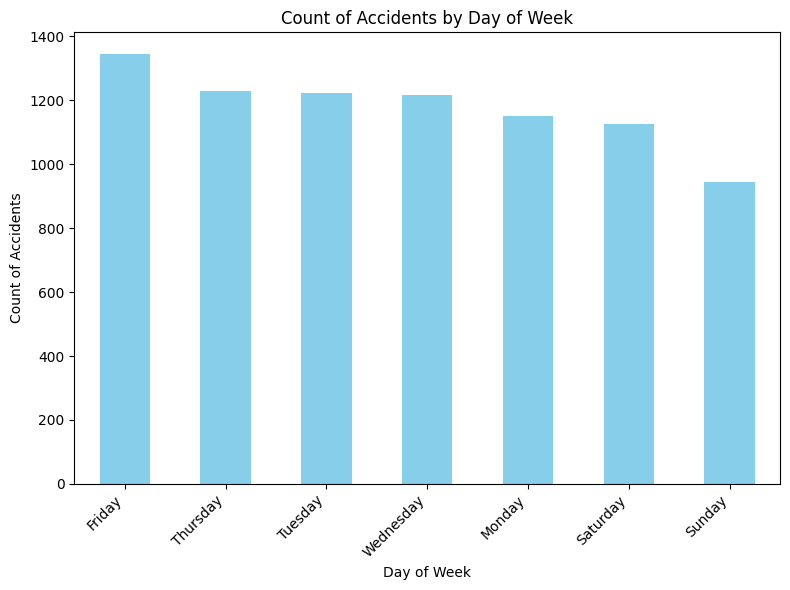

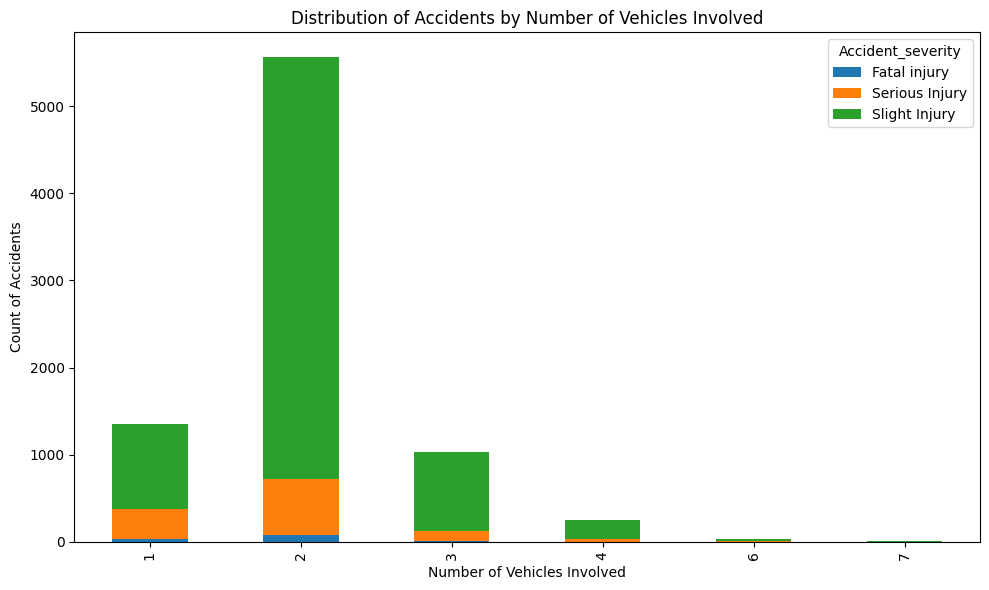

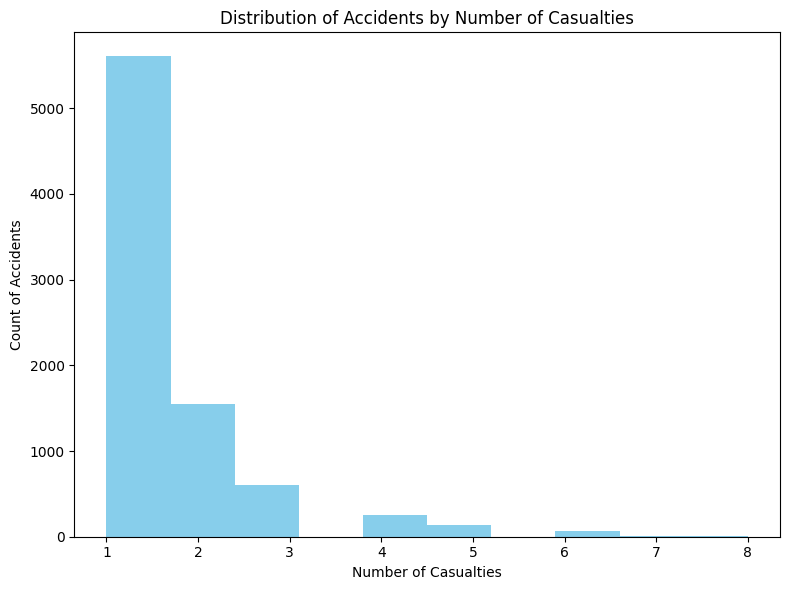

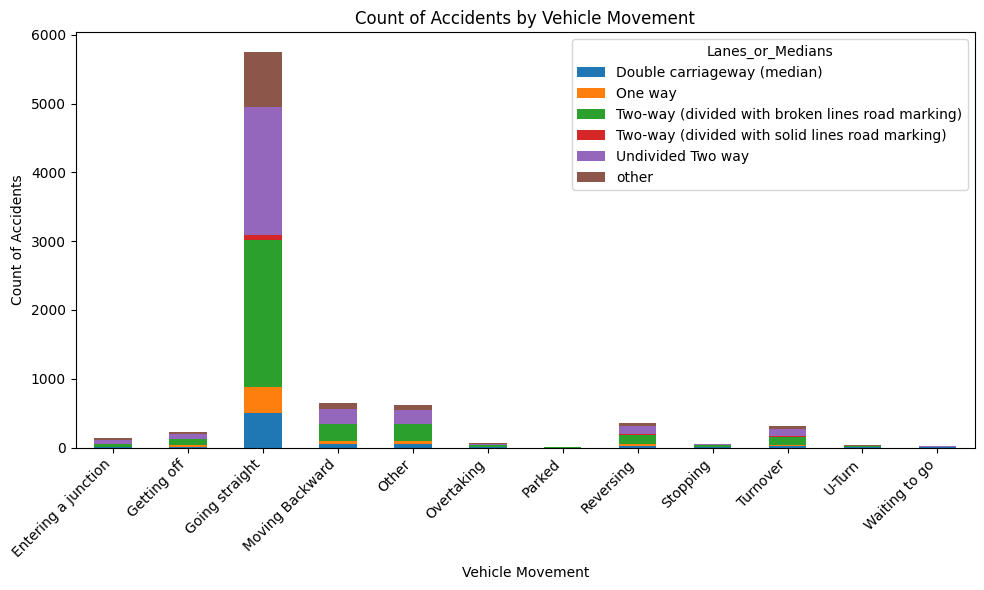

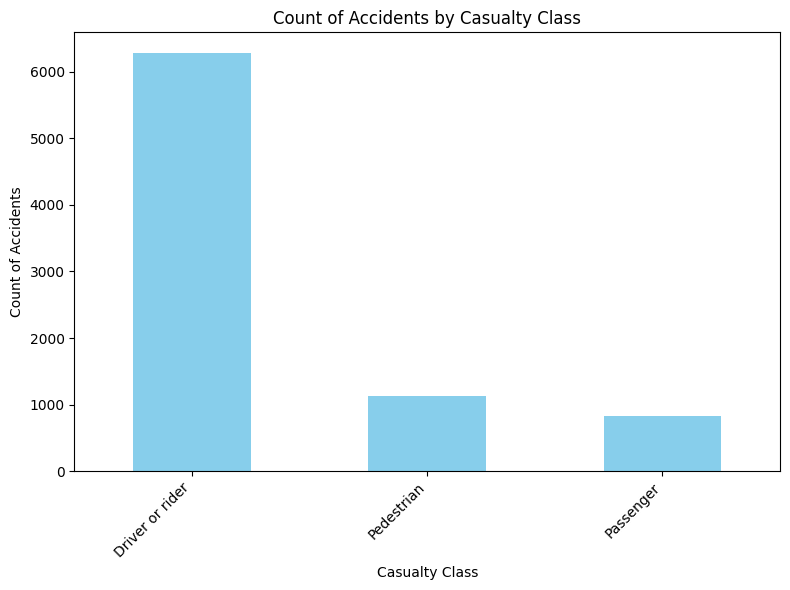

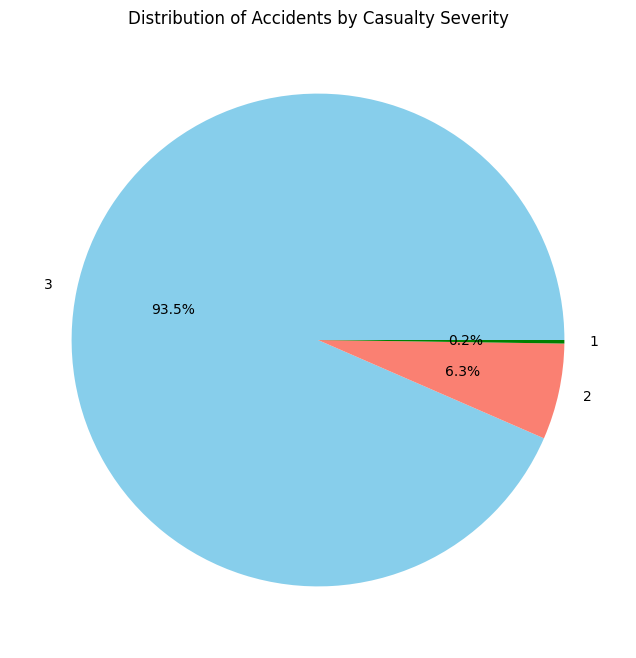

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

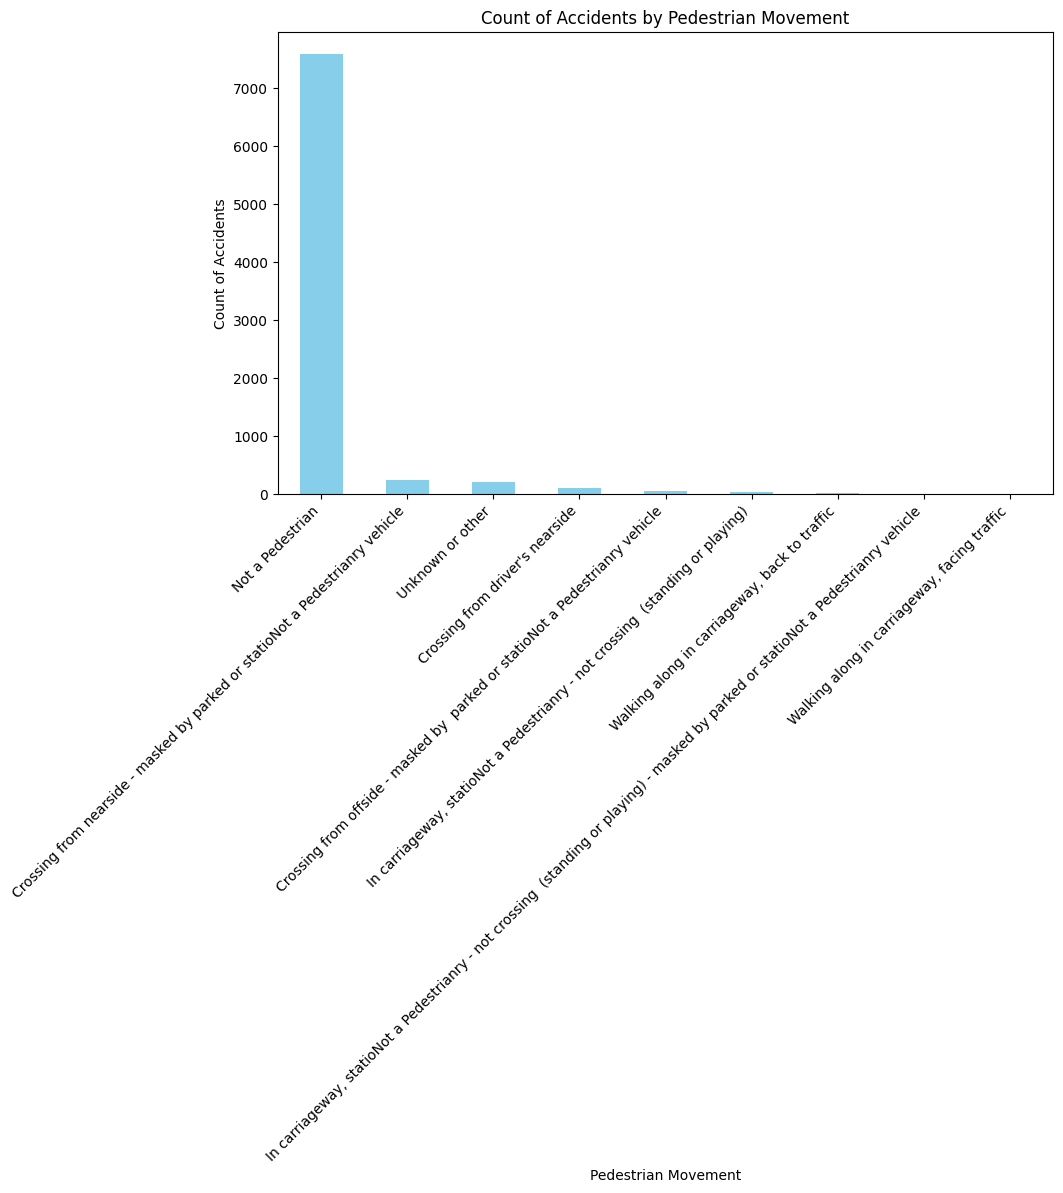

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming road_df is your DataFrame containing the relevant columns

# Time (Histogram)
grouped = road_df.groupby([road_df["Time"].dt.hour, road_df["Day_of_week"]]).size().unstack()
grouped.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('Count of Accidents')
plt.title('Distribution of Accidents Over Time')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

# Day of Week (Bar Chart)
day_counts = road_df['Day_of_week'].value_counts()
plt.figure(figsize=(8, 6))
day_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Day of Week')
plt.ylabel('Count of Accidents')
plt.title('Count of Accidents by Day of Week')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

# Number of Vehicles Involved (Histogram)
grouped = road_df.groupby([road_df["Number_of_vehicles_involved"], road_df["Accident_severity"]]).size().unstack()
grouped.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Count of Accidents')
plt.title('Distribution of Accidents by Number of Vehicles Involved')
plt.tight_layout()
plt.show()

# Number of Casualties (Histogram)
plt.figure(figsize=(8, 6))
plt.hist(road_df['Number_of_casualties'], bins=10, color='skyblue')
plt.xlabel('Number of Casualties')
plt.ylabel('Count of Accidents')
plt.title('Distribution of Accidents by Number of Casualties')
plt.tight_layout()
plt.show()

# Vehicle Movement (Bar Chart)
grouped = road_df.groupby([road_df["Vehicle_movement"], road_df["Lanes_or_Medians"]]).size().unstack()
grouped.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel('Vehicle Movement')
plt.ylabel('Count of Accidents')
plt.title('Count of Accidents by Vehicle Movement')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

# Casualty Class (Bar Chart)
casualty_class_counts = road_df['Casualty_class'].value_counts()
plt.figure(figsize=(8, 6))
casualty_class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Casualty Class')
plt.ylabel('Count of Accidents')
plt.title('Count of Accidents by Casualty Class')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

# Casualty Severity (Pie Chart)
severity_counts = road_df['Casualty_severity'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon', 'green'])
plt.title('Distribution of Accidents by Casualty Severity')
plt.show()

# Pedestrian Movement (Bar Chart)
pedestrian_counts = road_df['Pedestrian_movement'].value_counts()
plt.figure(figsize=(10, 6))
pedestrian_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Pedestrian Movement')
plt.ylabel('Count of Accidents')
plt.title('Count of Accidents by Pedestrian Movement')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout


Miscellaneous

<Figure size 1200x800 with 0 Axes>

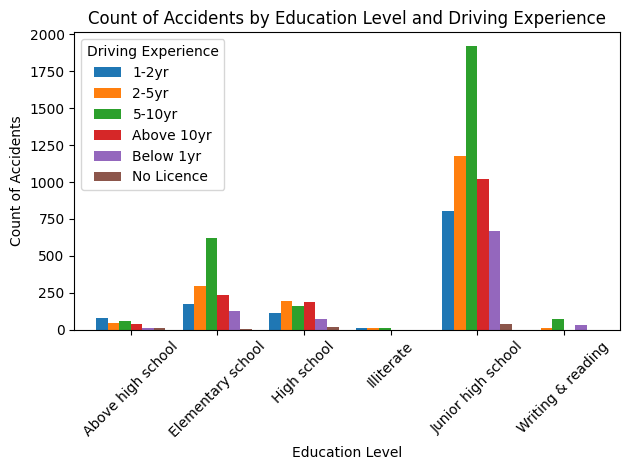

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming road_df is your DataFrame containing the relevant columns

# Group the data by education level and driving experience and count the occurrences
grouped_data = road_df.groupby(['Educational_level', 'Driving_experience']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', width=0.8)
plt.xlabel('Education Level')
plt.ylabel('Count of Accidents')
plt.title('Count of Accidents by Education Level and Driving Experience')
plt.xticks(rotation=45)
plt.legend(title='Driving Experience')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming road_df is your DataFrame containing the relevant columns

# Filter out rows where the 'Defect_of_vehicle' column is not null
defect_df = road_df.dropna(subset=['Defect_of_vehicle'])

# Convert 'Service_year_of_vehicle' to numeric (assuming it's not already)
defect_df['Service_year_of_vehicle'] = pd.to_numeric(defect_df['Service_year_of_vehicle'], errors='coerce')

print(defect_df)

# Drop rows with NaN values in 'Service_year_of_vehicle'
defect_df.dropna(subset=['Service_year_of_vehicle'], inplace=True)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(defect_df['Service_year_of_vehicle'], defect_df['Defect_of_vehicle'], color='skyblue', alpha=0.5)

# Fit a linear trend line
m, b = np.polyfit(defect_df['Service_year_of_vehicle'], defect_df['Defect_of_vehicle'], 1)
plt.plot(defect_df['Service_year_of_vehicle'], m*defect_df['Service_year_of_vehicle'] + b, color='salmon')

plt.xlabel('Service Year of Vehicle')
plt.ylabel('Presence of Defects')
plt.title('Relationship between Service Year of Vehicle and Presence of Defects')
plt.grid(True)
plt.tight_layout()
plt.show()


# California county dataset analysis


In [ ]:
cal_df = pd.read_csv("/content/drive/MyDrive/travel-and-crash-summary-for-county.csv")

In [ ]:
cal_df.info()
cal_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COUNTY          1566 non-null   object 
 1   LANE_TYPE       1566 non-null   object 
 2   RURAL_URBAN     1566 non-null   object 
 3   ROAD_MILES      1566 non-null   object 
 4   TRAVEL_MVM      1566 non-null   object 
 5   TOTAL_CRASHES   1566 non-null   object 
 6   PDO_CRASHES     1566 non-null   object 
 7   INJURY_CRASHES  1566 non-null   object 
 8   FATAL_CRASHES   1566 non-null   float64
 9   VICTIM_KILLED   1566 non-null   float64
 10  VICTIM_INJURED  1566 non-null   object 
 11  Unnamed: 11     0 non-null      float64
 12  Unnamed: 12     0 non-null      float64
 13  Unnamed: 13     0 non-null      float64
 14  Unnamed: 14     0 non-null      float64
 15  Unnamed: 15     0 non-null      float64
 16  Unnamed: 16     0 non-null      float64
 17  Unnamed: 17     0 non-null      f

,COUNTY,LANE_TYPE,RURAL_URBAN,ROAD_MILES,TRAVEL_MVM,TOTAL_CRASHES,PDO_CRASHES,INJURY_CRASHES,FATAL_CRASHES,VICTIM_KILLED,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,ALA,2 AND 3 LN,RURAL,6.0,43.5,41,18,22,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALA,4+ UND,RURAL,0.0,0.0,0,0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALA,4+ DIV,RURAL,0.6,6.7,26,25,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALA,SUBTOTAL,RURAL,6.6,50.3,67,43,23,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALA,2 AND 3 LN EXP,RURAL,0.0,0.0,0,0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cal_df = cal_df.iloc[:1567, 0:11]
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COUNTY          1566 non-null   object 
 1   LANE_TYPE       1566 non-null   object 
 2   RURAL_URBAN     1566 non-null   object 
 3   ROAD_MILES      1566 non-null   object 
 4   TRAVEL_MVM      1566 non-null   object 
 5   TOTAL_CRASHES   1566 non-null   object 
 6   PDO_CRASHES     1566 non-null   object 
 7   INJURY_CRASHES  1566 non-null   object 
 8   FATAL_CRASHES   1566 non-null   float64
 9   VICTIM_KILLED   1566 non-null   float64
 10  VICTIM_INJURED  1566 non-null   object 
dtypes: float64(2), object(9)
memory usage: 134.8+ KB


In [ ]:
col_to_con = ["ROAD_MILES", "TRAVEL_MVM", "TOTAL_CRASHES", "PDO_CRASHES", "INJURY_CRASHES", "VICTIM_INJURED"]     # columns to convert from "object" to "float"

for col in col_to_con:
  cal_df[col] = cal_df[col].str.replace(',', '')
  cal_df[col] = pd.to_numeric(cal_df[col], errors='coerce')

cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COUNTY          1566 non-null   object 
 1   LANE_TYPE       1566 non-null   object 
 2   RURAL_URBAN     1566 non-null   object 
 3   ROAD_MILES      1566 non-null   float64
 4   TRAVEL_MVM      1566 non-null   float64
 5   TOTAL_CRASHES   1566 non-null   float64
 6   PDO_CRASHES     1566 non-null   float64
 7   INJURY_CRASHES  1566 non-null   float64
 8   FATAL_CRASHES   1566 non-null   float64
 9   VICTIM_KILLED   1566 non-null   float64
 10  VICTIM_INJURED  1566 non-null   float64
dtypes: float64(8), object(3)
memory usage: 134.8+ KB


In [ ]:
cal_df.head(20)

,COUNTY,LANE_TYPE,RURAL_URBAN,ROAD_MILES,TRAVEL_MVM,TOTAL_CRASHES,PDO_CRASHES,INJURY_CRASHES,FATAL_CRASHES,VICTIM_KILLED,VICTIM_INJURED
0,ALA,2 AND 3 LN,RURAL,6.0,43.5,41.0,18.0,22.0,1.0,2.0,44.0
1,ALA,4+ UND,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ALA,4+ DIV,RURAL,0.6,6.7,26.0,25.0,1.0,0.0,0.0,1.0
3,ALA,SUBTOTAL,RURAL,6.6,50.3,67.0,43.0,23.0,1.0,2.0,45.0
4,ALA,2 AND 3 LN EXP,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ALA,4+ DIV EXP,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ALA,NON FWY,RURAL,6.6,50.3,67.0,43.0,23.0,1.0,2.0,45.0
7,ALA,FREEWAY,RURAL,13.4,619.4,694.0,478.0,212.0,4.0,5.0,298.0
8,ALA,TOTAL,RURAL,20.0,669.7,761.0,521.0,235.0,5.0,7.0,343.0
9,ALA,2 AND 3 LN,URBAN,8.1,57.8,38.0,17.0,21.0,0.0,0.0,33.0


In [ ]:
cal_df.isnull().sum()
cal_df = cal_df.dropna()
cal_df.isnull().sum()
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1566 entries, 0 to 1565
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COUNTY          1566 non-null   object 
 1   LANE_TYPE       1566 non-null   object 
 2   RURAL_URBAN     1566 non-null   object 
 3   ROAD_MILES      1566 non-null   float64
 4   TRAVEL_MVM      1566 non-null   float64
 5   TOTAL_CRASHES   1566 non-null   float64
 6   PDO_CRASHES     1566 non-null   float64
 7   INJURY_CRASHES  1566 non-null   float64
 8   FATAL_CRASHES   1566 non-null   float64
 9   VICTIM_KILLED   1566 non-null   float64
 10  VICTIM_INJURED  1566 non-null   float64
dtypes: float64(8), object(3)
memory usage: 146.8+ KB


In [ ]:
cal_df['LANE_TYPE'] = cal_df['LANE_TYPE'].str.strip()
cal_df = cal_df[~cal_df['LANE_TYPE'].str.lower().isin(['subtotal', 'total'])]

In [ ]:
obj_col = ["LANE_TYPE", "RURAL_URBAN"]
for col in obj_col:
  print(cal_df[col].value_counts())

2 AND 3 LN        174
4+ UND            174
4+ DIV            174
2 AND 3 LN EXP    174
4+ DIV EXP        174
NON FWY           174
FREEWAY           174
Name: LANE_TYPE, dtype: int64
RURAL         406
URBAN         406
COUNTYWIDE    406
Name: RURAL_URBAN, dtype: int64


In [ ]:
cal_df.head()

,COUNTY,LANE_TYPE,RURAL_URBAN,ROAD_MILES,TRAVEL_MVM,TOTAL_CRASHES,PDO_CRASHES,INJURY_CRASHES,FATAL_CRASHES,VICTIM_KILLED,VICTIM_INJURED
0,ALA,2 AND 3 LN,RURAL,6.0,43.5,41.0,18.0,22.0,1.0,2.0,44.0
1,ALA,4+ UND,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ALA,4+ DIV,RURAL,0.6,6.7,26.0,25.0,1.0,0.0,0.0,1.0
4,ALA,2 AND 3 LN EXP,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ALA,4+ DIV EXP,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


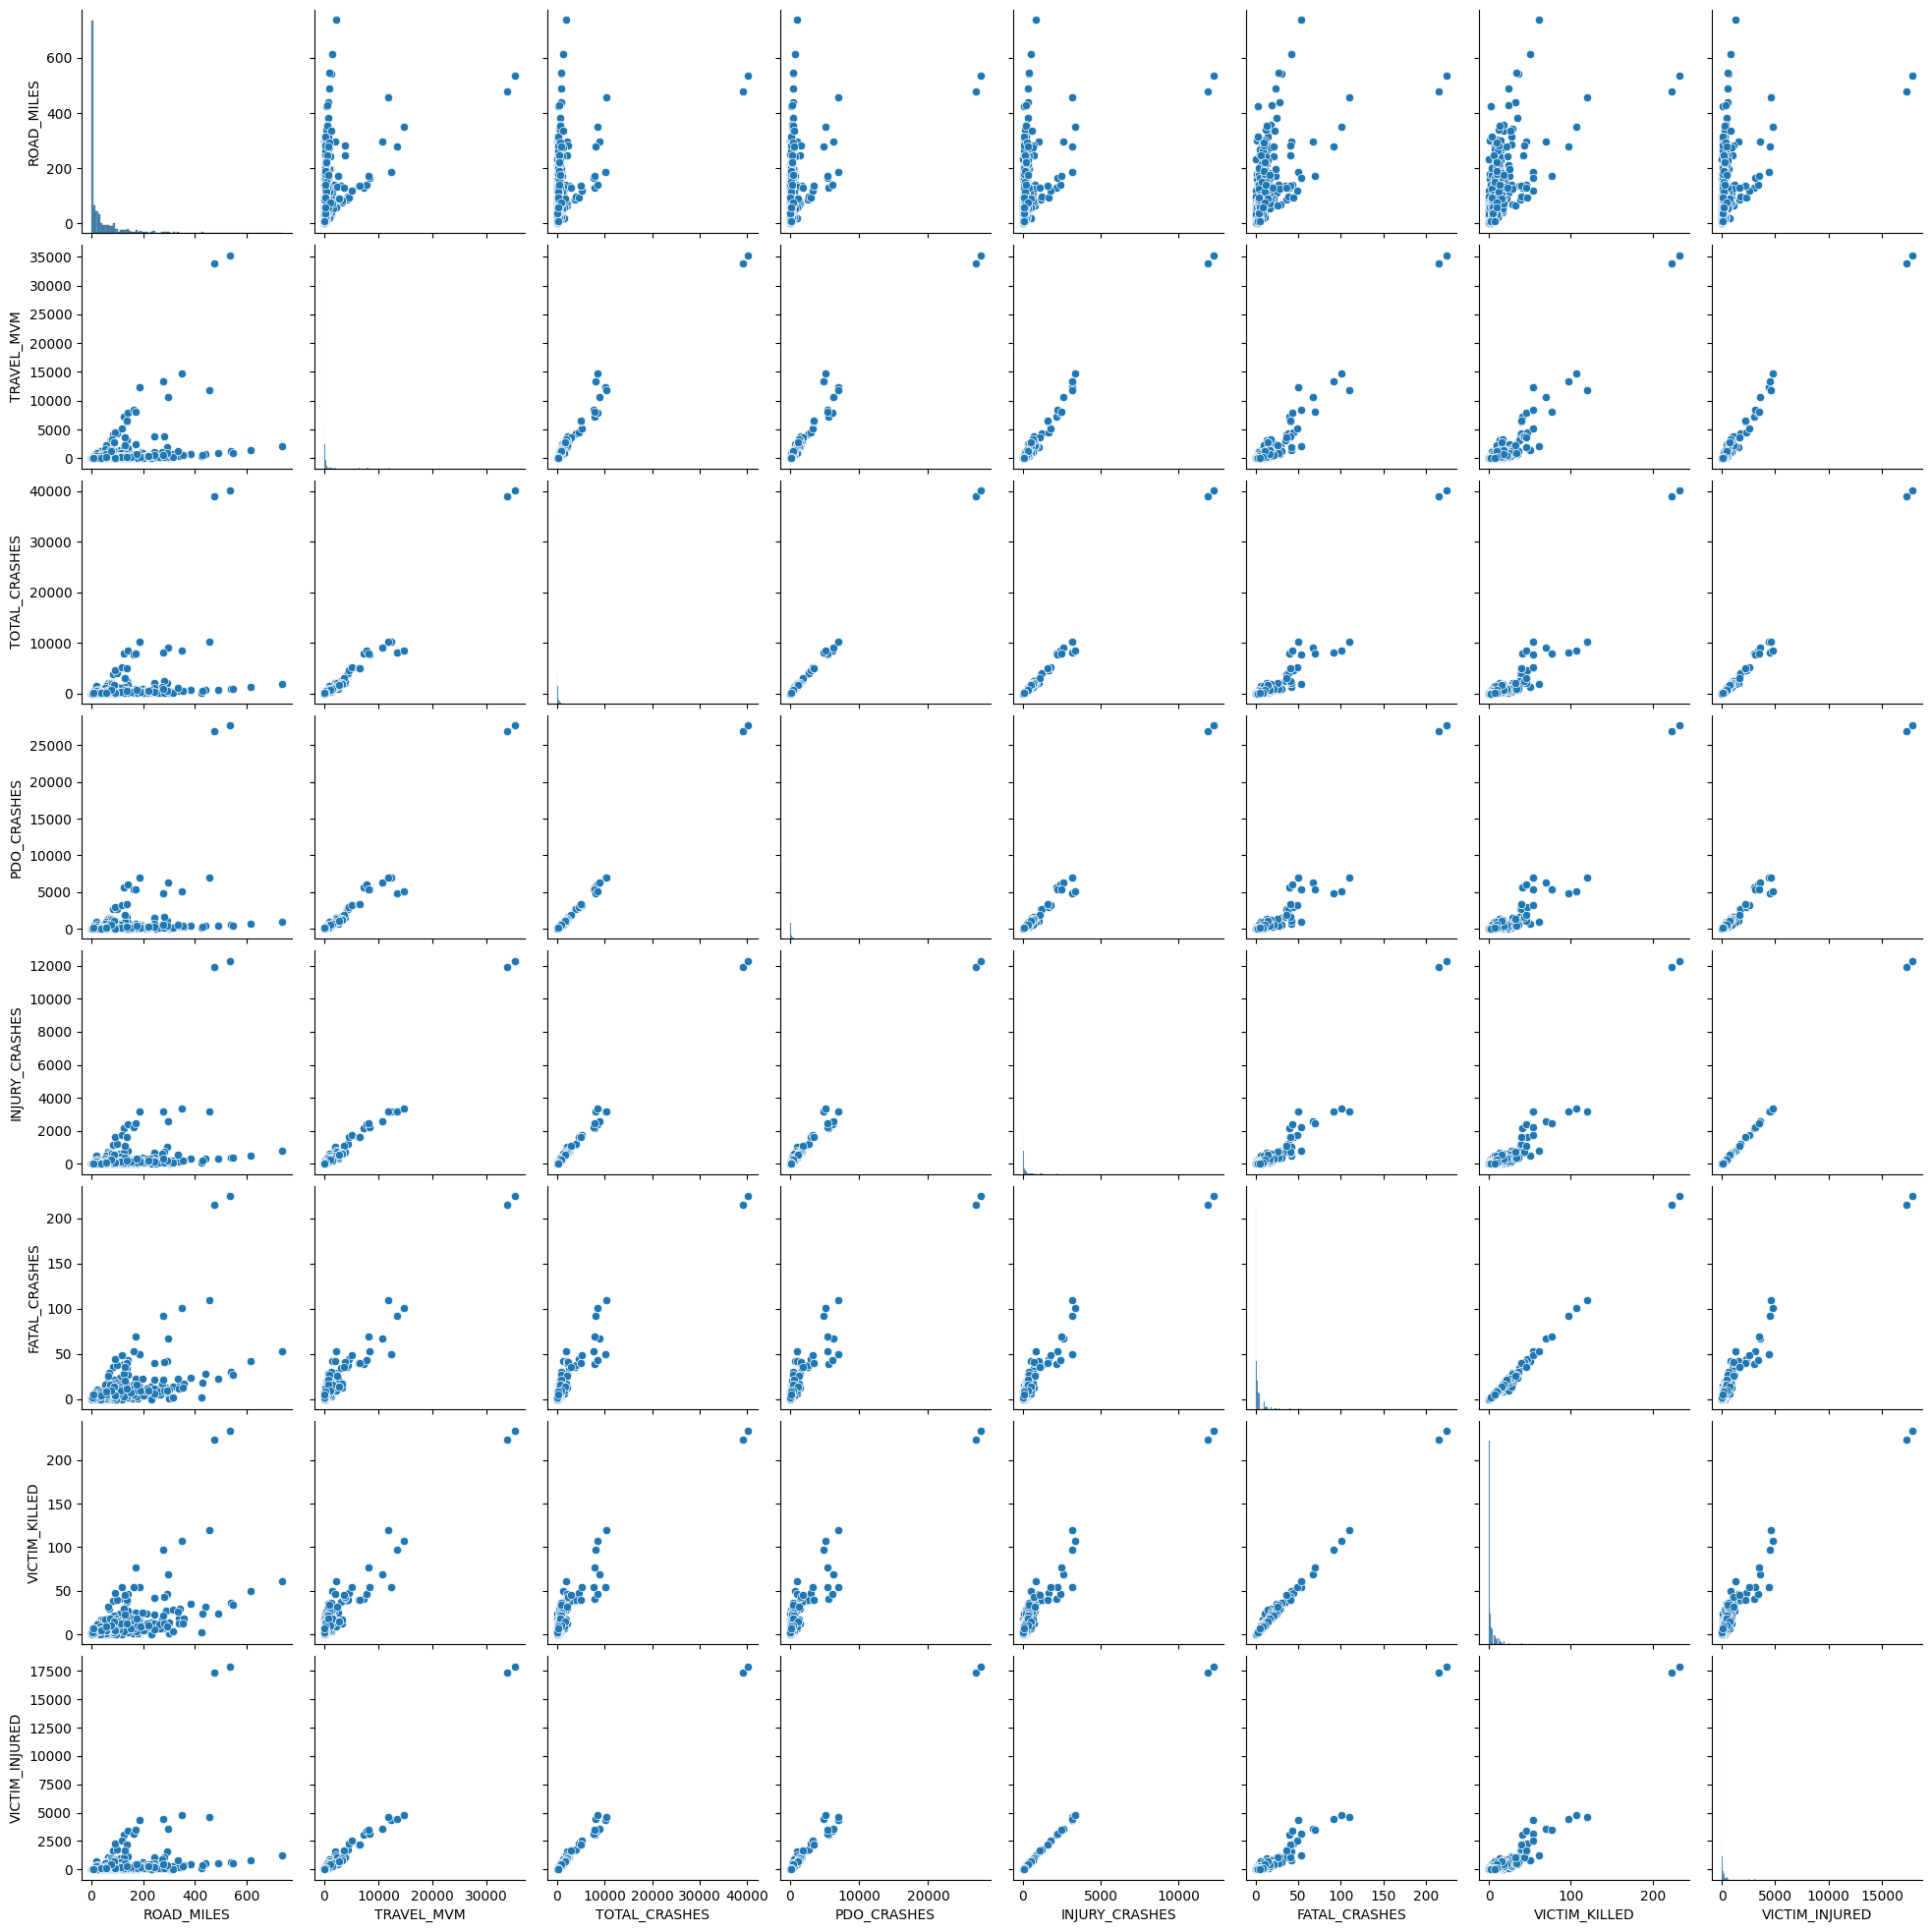

In [68]:
sns.pairplot(cal_df)

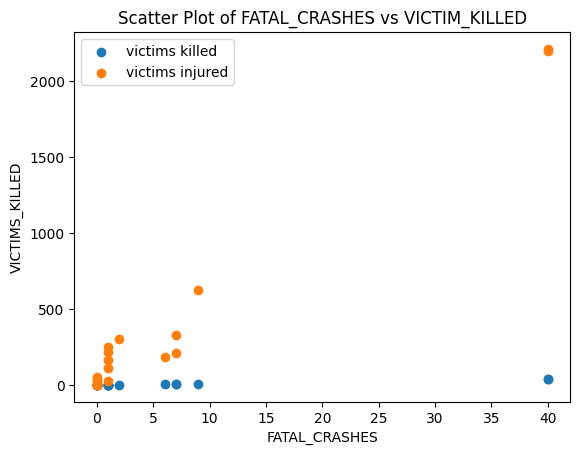

In [82]:
scl_rows = cal_df[cal_df['COUNTY'] == 'SCL']

plt.scatter(scl_rows['FATAL_CRASHES'], scl_rows['VICTIM_KILLED'], label = 'victims killed')
plt.scatter(scl_rows['FATAL_CRASHES'], scl_rows['VICTIM_INJURED'], label = 'victims injured')

# Adding labels and title
plt.xlabel('FATAL_CRASHES')
plt.ylabel('VICTIMS')
plt.title('Scatter Plot of FATAL_CRASHES vs VICTIM_KILLED')
plt.legend()
# Displaying the plot
plt.show()

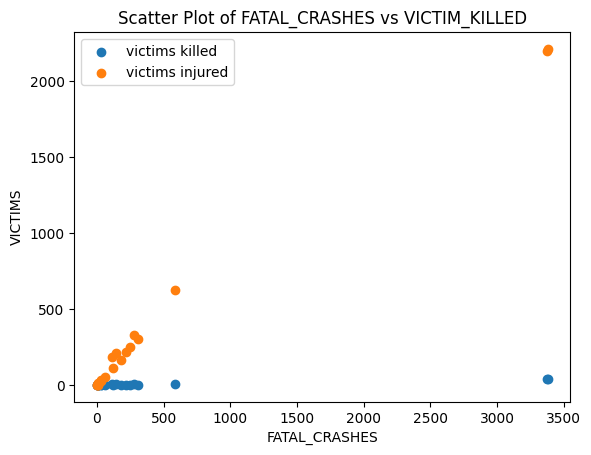

In [83]:
scl_rows = cal_df[cal_df['COUNTY'] == 'SCL']

plt.scatter(scl_rows['PDO_CRASHES'], scl_rows['VICTIM_KILLED'], label = 'victims killed')
plt.scatter(scl_rows['PDO_CRASHES'], scl_rows['VICTIM_INJURED'], label = 'victims injured')

# Adding labels and title
plt.xlabel('FATAL_CRASHES')
plt.ylabel('VICTIMS')
plt.title('Scatter Plot of FATAL_CRASHES vs VICTIM_KILLED')
plt.legend()
# Displaying the plot
plt.show()

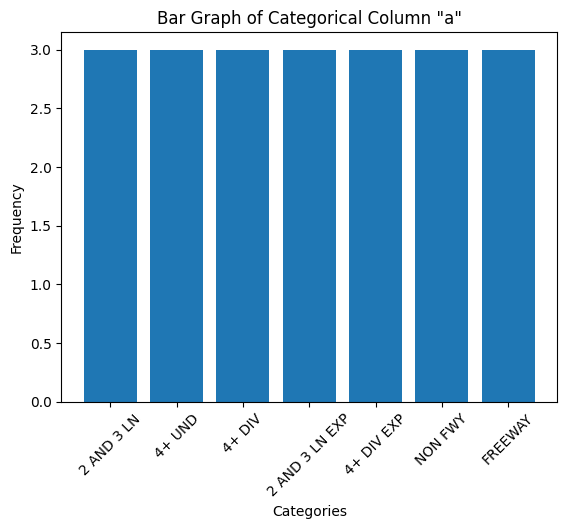

In [74]:
category_counts = scl_rows['LANE_TYPE'].value_counts()

# Plotting the bar graph
plt.bar(category_counts.index, category_counts.values)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Bar Graph of Categorical Column "a"')

# Rotating x-axis labels if needed
plt.xticks(rotation=45)  # Adjust the rotation angle as needed

# Displaying the plot
plt.show()